### Import the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import itertools

## Import the dataset

In [3]:
application_data= pd.read_csv('D:/Data Science M.S/EDA/drive-download-20221025T112813Z-001/application_data.csv')
previous_data = pd.read_csv('D:/Data Science M.S/EDA/drive-download-20221025T112813Z-001/previous_application.csv')

### Structure of the data/ Understandiing Data

In [4]:
print(f"Application data has {application_data.shape[0]} rows and {application_data.shape[1]} columns")
print(f"Previous Application data has {previous_data.shape[0]} rows and {previous_data.shape[1]} columns")

Application data has 307511 rows and 122 columns
Previous Application data has 1670214 rows and 37 columns


In [5]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)


In [6]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [9]:
previous_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [10]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [11]:
previous_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Data Cleaning and Missing Values Handling

<AxesSubplot:>

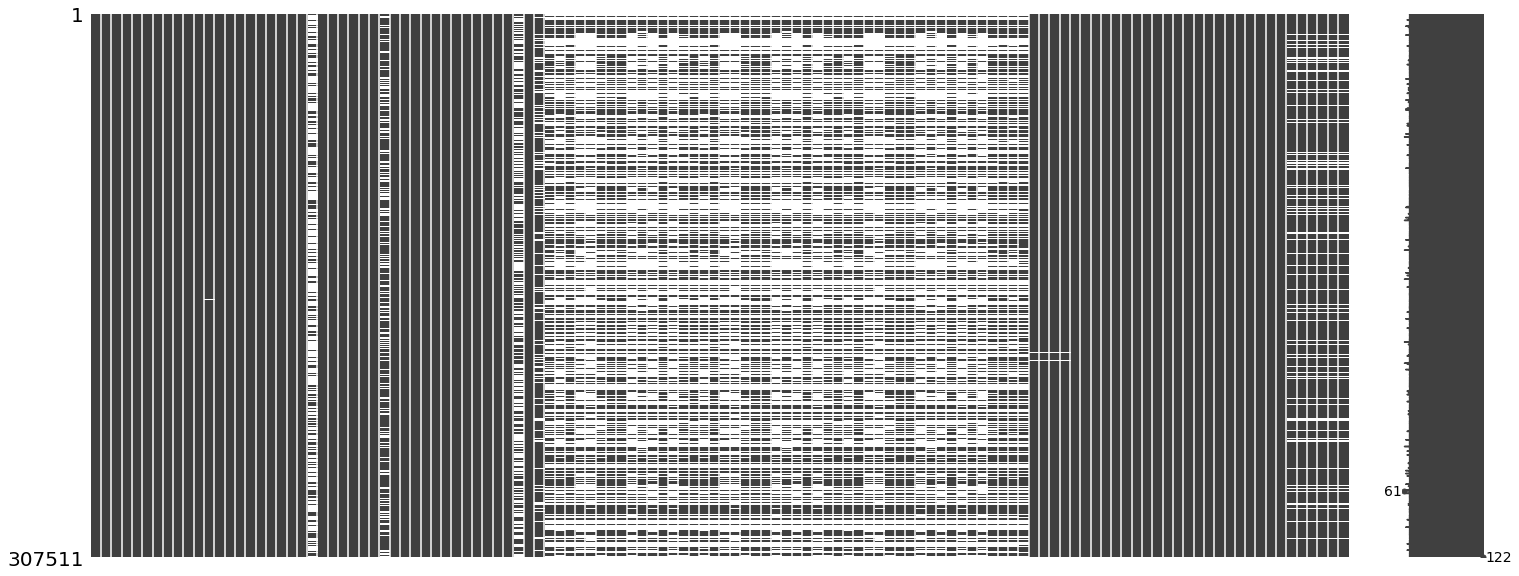

In [12]:
import missingno as mn
mn.matrix(application_data)

<AxesSubplot:>

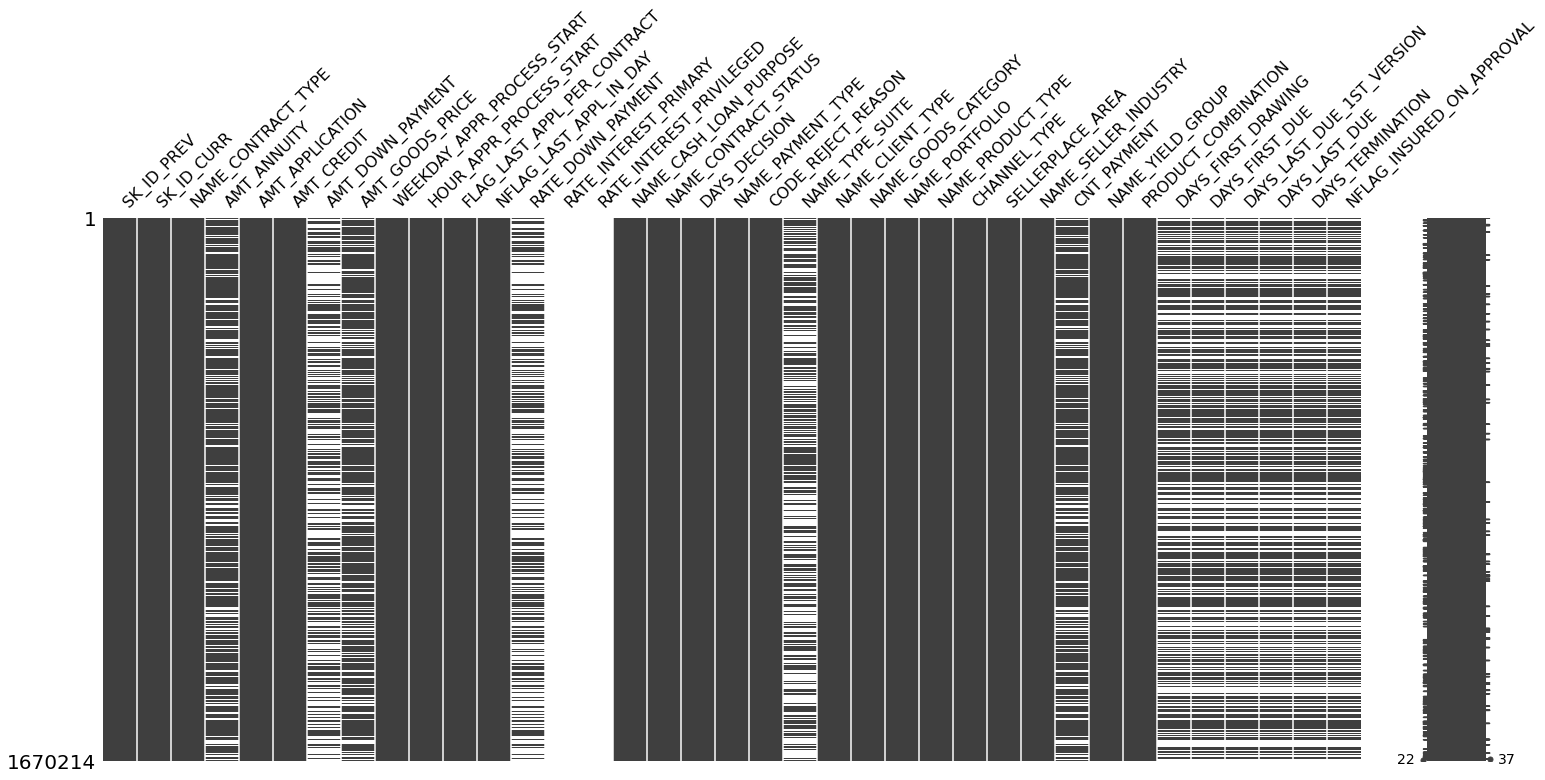

In [13]:
mn.matrix(previous_data)

In [14]:
col_info= round(application_data.isnull().sum() / application_data.shape[0] * 100.00,2)
col_info.sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [15]:
col_info_gt_40 = col_info[col_info>40]

In [16]:
print(f"There are {len(col_info_gt_40)} columns with more than 40% null values")

There are 49 columns with more than 40% null values


In [17]:
col_info_pd= round(previous_data.isnull().sum() / previous_data.shape[0] * 100.00,2)
col_info_pd.sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
DAYS_TERMINATION               40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
SK_ID_PREV                      0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
N

In [18]:
col_info_pd_gt_40 = col_info_pd[col_info_pd>40]

In [19]:
print(f"There are {len(col_info_pd_gt_40)} columns in previous data with more than 40% null values")

There are 11 columns in previous data with more than 40% null values


##### We can drop these columns from both dataset

In [20]:
columns_to_drop_ad = col_info_gt_40.index
columns_to_drop_ad = list(columns_to_drop_ad)
columns_to_drop_ad

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [21]:
application_data.drop(columns= columns_to_drop_ad,inplace=True)

In [22]:
application_data.shape

(307511, 73)

In [23]:
columns_to_drop_pd = col_info_pd_gt_40.index
columns_to_drop_pd = list(columns_to_drop_pd)
columns_to_drop_pd

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [24]:
previous_data.drop(columns= columns_to_drop_pd,inplace=True)

In [25]:
previous_data.shape

(1670214, 26)

##### We can remove additional unnecessay columns which are not used in our analysis

##### Application Data

In [26]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [27]:
flag_cols_with_target= application_data[['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','TARGET']]
flag_cols_with_target.corr()

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
FLAG_DOCUMENT_2,1.000000,-0.010174,-0.000059,-0.000805,-0.002020,-0.000090,-0.001935,-0.000407,-0.000031,-0.000407,-0.000017,-0.000387,-0.000353,-0.000226,-0.000651,-0.000106,-0.000589,-0.000159,-0.000146,-0.000119,0.005417
FLAG_DOCUMENT_3,-0.010174,1.000000,-0.014110,-0.193850,-0.486238,-0.021677,-0.465730,-0.097859,-0.007466,-0.093242,-0.001180,-0.020274,0.002099,0.000592,0.033418,0.002536,0.007976,0.009423,0.007396,-0.025510,0.044346
FLAG_DOCUMENT_4,-0.000059,-0.014110,1.000000,-0.001117,-0.002802,-0.000125,-0.002684,-0.000564,-0.000043,-0.000565,-0.000023,-0.000536,-0.000489,-0.000314,-0.000903,-0.000147,-0.000816,-0.000220,-0.000203,-0.000165,-0.002672
FLAG_DOCUMENT_5,-0.000805,-0.193850,-0.001117,1.000000,-0.038495,-0.001716,-0.036871,-0.007747,-0.000591,-0.007764,-0.000316,-0.007368,-0.006723,-0.004311,-0.012137,-0.002023,-0.010622,-0.003023,-0.002791,0.000645,-0.000316
FLAG_DOCUMENT_6,-0.002020,-0.486238,-0.002802,-0.038495,1.000000,-0.004305,-0.092485,-0.019433,-0.001483,-0.018738,-0.000792,-0.017514,-0.014318,-0.009824,-0.026603,-0.004372,-0.023915,-0.004759,-0.005981,-0.005688,-0.028602
FLAG_DOCUMENT_7,-0.000090,-0.021677,-0.000125,-0.001716,-0.004305,1.000000,-0.004123,-0.000866,-0.000066,-0.000868,-0.000035,-0.000824,-0.000752,-0.000482,-0.001387,-0.000226,-0.001254,-0.000338,-0.000312,-0.000254,-0.001520
FLAG_DOCUMENT_8,-0.001935,-0.465730,-0.002684,-0.036871,-0.092485,-0.004123,1.000000,-0.018613,-0.001420,-0.017509,0.003905,0.077019,0.030228,0.023517,0.012783,0.005338,0.007756,0.000053,0.003859,-0.001548,-0.008040
FLAG_DOCUMENT_9,-0.000407,-0.097859,-0.000564,-0.007747,-0.019433,-0.000866,-0.018613,1.000000,-0.000298,-0.003919,-0.000159,0.000684,0.001430,0.002329,0.008480,0.008570,0.001895,-0.001526,-0.001409,-0.001145,-0.004352
FLAG_DOCUMENT_10,-0.000031,-0.007466,-0.000043,-0.000591,-0.001483,-0.000066,-0.001420,-0.000298,1.000000,-0.000299,-0.000012,-0.000284,-0.000259,-0.000166,-0.000478,-0.000078,-0.000432,-0.000116,-0.000107,-0.000087,-0.001414
FLAG_DOCUMENT_11,-0.000407,-0.093242,-0.000565,-0.007764,-0.018738,-0.000868,-0.017509,-0.003919,-0.000299,1.000000,-0.000160,-0.003727,-0.003401,-0.002181,-0.006276,-0.001024,-0.005674,-0.001529,-0.001412,-0.001147,-0.004229


<AxesSubplot:>

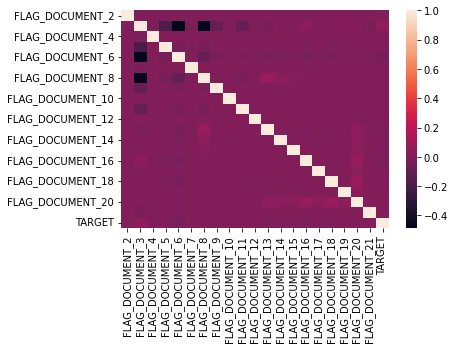

In [28]:
sns.heatmap(flag_cols_with_target.corr())

In [29]:
flag_cols = flag_cols_with_target.drop(columns='TARGET')

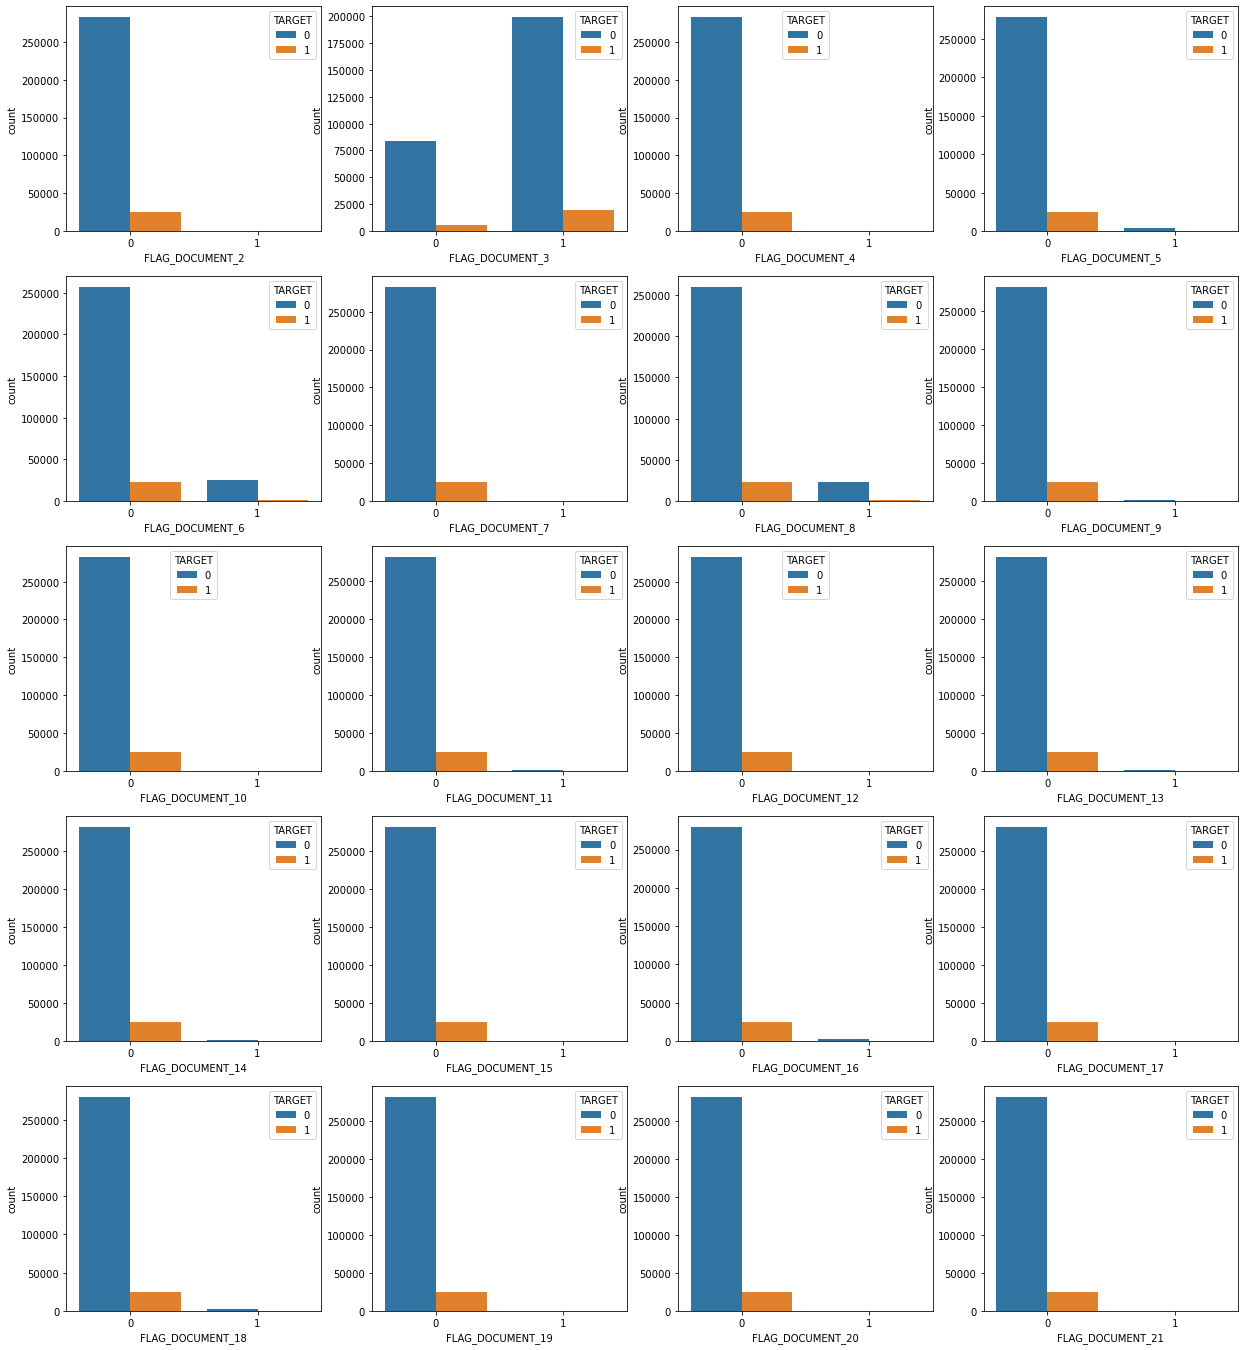

In [30]:
plt.figure(figsize=(21,24))
for column,pos in itertools.zip_longest(flag_cols,range(len(flag_cols.columns))):
    plt.subplot(5,4,pos+1)
    ax=sns.countplot(application_data[column],hue = application_data['TARGET'])

###### As we can see there is no correlation between target variable and flag docs, and there are almost negligible amount people who has produced these documents expect for document 3 hence we can remove these columns and keep only FLAG_DOCUMENT 3

In [31]:
cols_to_drop = []
cols_to_drop.extend(['FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'])

<AxesSubplot:>

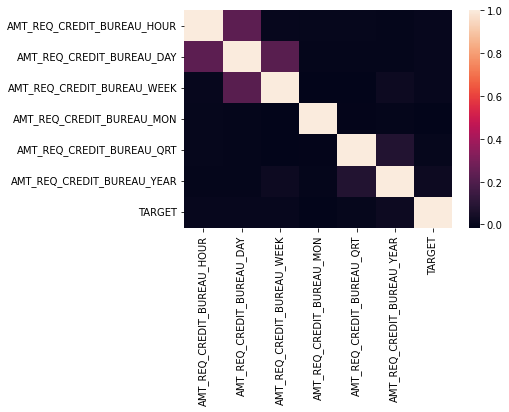

In [32]:
amt_cols_with_target = application_data[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR','TARGET']]
sns.heatmap(amt_cols_with_target.corr())

In [33]:
amt_cols = amt_cols_with_target.drop(columns='TARGET')


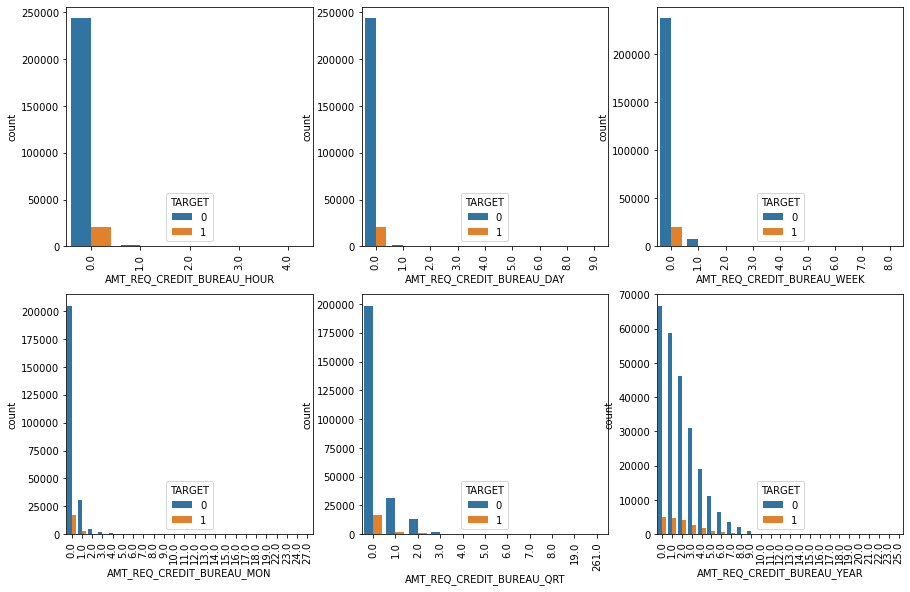

In [34]:
plt.figure(figsize=(15,15))
for column,pos in itertools.zip_longest(amt_cols.columns,range(len(amt_cols.columns))):
    plt.subplot(3,3,pos+1)
    ax=sns.countplot(application_data[column],hue = application_data['TARGET'])
    plt.xticks(rotation=90)

##### Except for AMT_REQ_CREDIT_BUREAU_YEAR all the data is skewed towards the value 0 so we can keep this columns and drop the rest

In [35]:
amt_cols_to_drop = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT']
cols_to_drop.extend(amt_cols_to_drop)
cols_to_drop

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT']

<AxesSubplot:>

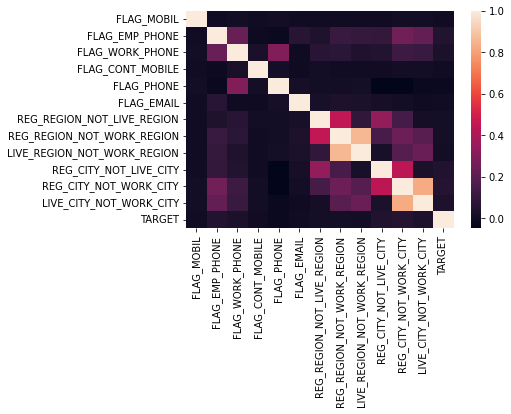

In [36]:
contact_cols_with_target = application_data[['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','TARGET']]
sns.heatmap(contact_cols_with_target.corr())

In [37]:
contact_cols = contact_cols_with_target.drop(columns='TARGET')

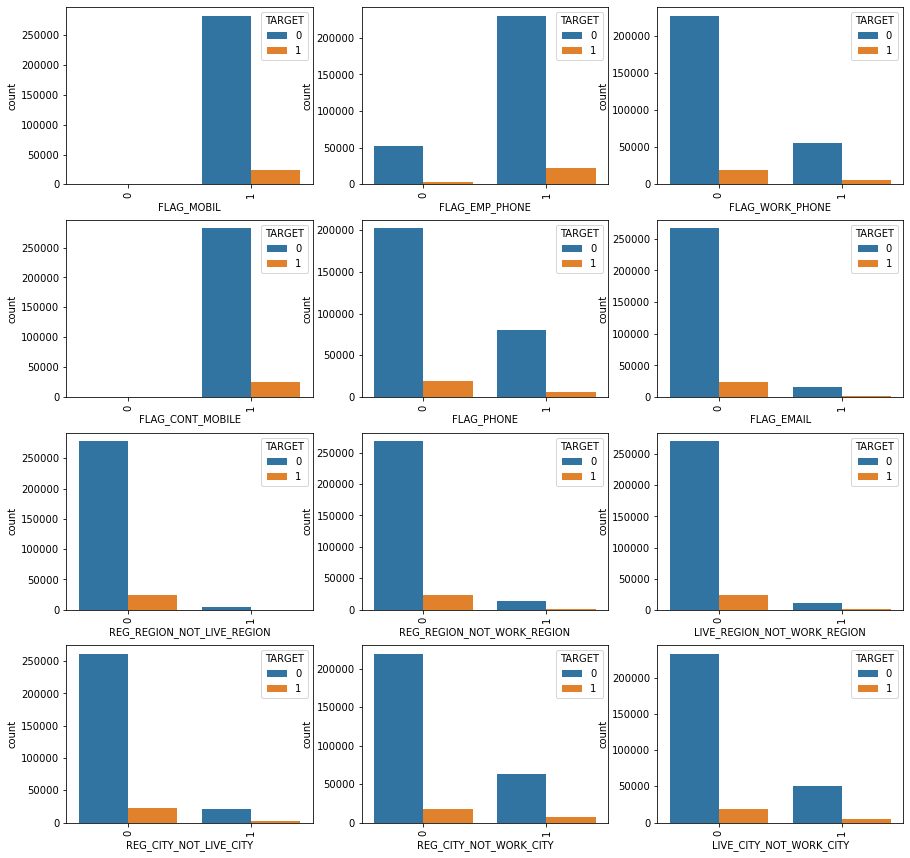

In [38]:
plt.figure(figsize=(15,15))
for column,pos in itertools.zip_longest(contact_cols.columns,range(len(contact_cols.columns))):
    plt.subplot(4,3,pos+1)
    ax=sns.countplot(application_data[column],hue = application_data['TARGET'])
    plt.xticks(rotation=90)

##### All these variables have very low coorelation with the target variable so we can drop these

In [39]:
cols_to_drop.extend(['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',])

In [40]:
len(cols_to_drop)

36

In [41]:
application_data.drop(columns=cols_to_drop, inplace=True)

In [42]:
application_data.shape

(307511, 37)

##### Previous Data

In [43]:
previous_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [44]:
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [45]:
cols_to_drop_pd = ['NFLAG_LAST_APPL_IN_DAY','FLAG_LAST_APPL_PER_CONTRACT']

##### We can drop these two columns as they don't seem to have a logical impact

In [46]:
amt_cols_pd = previous_data[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE']]

In [47]:
amt_cols_pd.corr()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE
AMT_ANNUITY,1.000000,0.808872,0.816429,0.820895
AMT_APPLICATION,0.808872,1.000000,0.975824,0.999884
AMT_CREDIT,0.816429,0.975824,1.000000,0.993087
AMT_GOODS_PRICE,0.820895,0.999884,0.993087,1.000000


<AxesSubplot:>

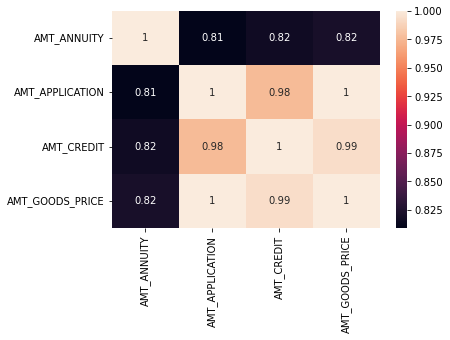

In [48]:
sns.heatmap(amt_cols_pd.corr(),annot=True)

In [49]:
amt_cols_pd.describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE
count,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06
mean,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05
std,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04
50%,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05
75%,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05
max,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06


###### These columns show very high correlation between each other so we can keep just one. Since AMT_APPLICATION has the highest count, we will go with AMT_APPLICATION

In [50]:
cols_to_drop_pd.extend(['AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE'])
cols_to_drop_pd

['NFLAG_LAST_APPL_IN_DAY',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE']

In [51]:
previous_data.drop(columns= cols_to_drop_pd,inplace =True)

In [52]:
previous_data.shape

(1670214, 21)

In [53]:
def col_type(df):
    cat_cols = []
    num_cols = []
    for column in df.columns:
        if df[column].dtype=='object':
            cat_cols.append(column)
        else:
            num_cols.append(column)
    print('Categorical columns ')
    print(cat_cols)
    print('*'*80)
    print('Numerical columns')
    print(num_cols)

In [54]:
col_type(application_data)


Categorical columns 
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
********************************************************************************
Numerical columns
['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [55]:
col_type(previous_data)

Categorical columns 
['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']
********************************************************************************
Numerical columns
['SK_ID_PREV', 'SK_ID_CURR', 'AMT_APPLICATION', 'HOUR_APPR_PROCESS_START', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT']


### Imputing the data

In [56]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,1,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,1,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,1,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0.0


In [57]:
cols_to_impute_ad= round(application_data.isna().sum()/application_data.shape[0]*100,2)
cols_to_impute_ad = cols_to_impute_ad[cols_to_impute_ad>0]
cols_to_impute_ad

AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
OCCUPATION_TYPE               31.35
EXT_SOURCE_2                   0.21
EXT_SOURCE_3                  19.83
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
dtype: float64

In [58]:
def Imputer(cols_to_impute, df):
    cat_cols_to_impute = []
    num_cols_to_impute = []
    for cols in cols_to_impute.index:
        if df[cols].dtype=='object':
            cat_cols_to_impute.append(cols)
        else:
            num_cols_to_impute.append(cols)
    for cat_cols in cat_cols_to_impute:
        df[cat_cols] = df[cat_cols].replace(np.nan,'Unknown')
    for num_cols in num_cols_to_impute:
        df[num_cols] = df[num_cols].replace(np.nan, df[num_cols].median())
        
        

In [59]:
Imputer(cols_to_impute_ad,application_data)

In [60]:
round(application_data.isna().sum()/application_data.shape[0]*100,2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
ORGANIZATION_TYPE              0.0
EXT_SOURCE_2        

In [61]:
cols_to_impute_pd= round(previous_data.isna().sum()/previous_data.shape[0]*100,2)
cols_to_impute_pd = cols_to_impute_pd[cols_to_impute_pd>0]
cols_to_impute_pd

CNT_PAYMENT            22.29
PRODUCT_COMBINATION     0.02
dtype: float64

In [62]:
Imputer(cols_to_impute_pd,previous_data)

In [63]:
round(previous_data.isna().sum()/previous_data.shape[0]*100,2)

SK_ID_PREV                    0.0
SK_ID_CURR                    0.0
NAME_CONTRACT_TYPE            0.0
AMT_APPLICATION               0.0
WEEKDAY_APPR_PROCESS_START    0.0
HOUR_APPR_PROCESS_START       0.0
NAME_CASH_LOAN_PURPOSE        0.0
NAME_CONTRACT_STATUS          0.0
DAYS_DECISION                 0.0
NAME_PAYMENT_TYPE             0.0
CODE_REJECT_REASON            0.0
NAME_CLIENT_TYPE              0.0
NAME_GOODS_CATEGORY           0.0
NAME_PORTFOLIO                0.0
NAME_PRODUCT_TYPE             0.0
CHANNEL_TYPE                  0.0
SELLERPLACE_AREA              0.0
NAME_SELLER_INDUSTRY          0.0
CNT_PAYMENT                   0.0
NAME_YIELD_GROUP              0.0
PRODUCT_COMBINATION           0.0
dtype: float64

## Outlier Detection

In [64]:
num_cols_in_ad = [col for col in application_data.columns if (application_data[col].dtype=='int64') | (application_data[col].dtype=='float64')]
num_cols_in_ad

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_3',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [65]:
len(num_cols_in_ad)

25

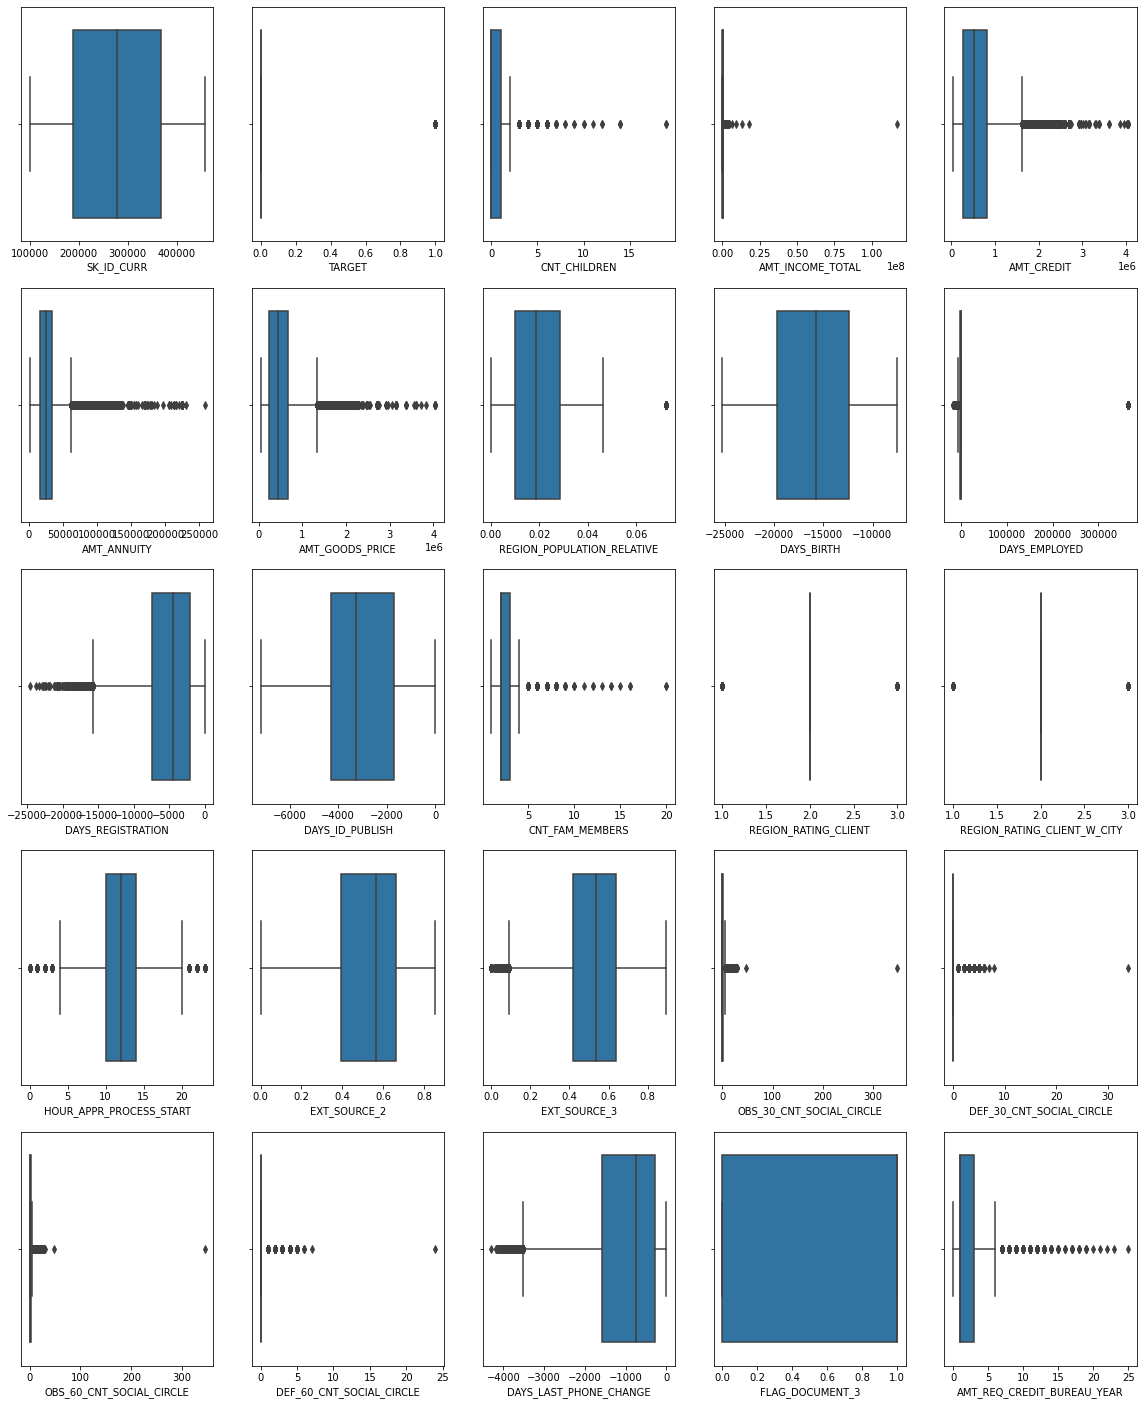

In [66]:
plt.figure(figsize=(20,25))
for column,pos in itertools.zip_longest(num_cols_in_ad,range(len(num_cols_in_ad))):
    plt.subplot(5,5,pos+1)
    ax=sns.boxplot(application_data[column])
    

In [67]:
num_cols_in_pd = [col for col in previous_data.columns if (previous_data[col].dtype=='int64') | (previous_data[col].dtype=='float64')]
num_cols_in_pd

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_APPLICATION',
 'HOUR_APPR_PROCESS_START',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT']

In [68]:
len(num_cols_in_pd)

7

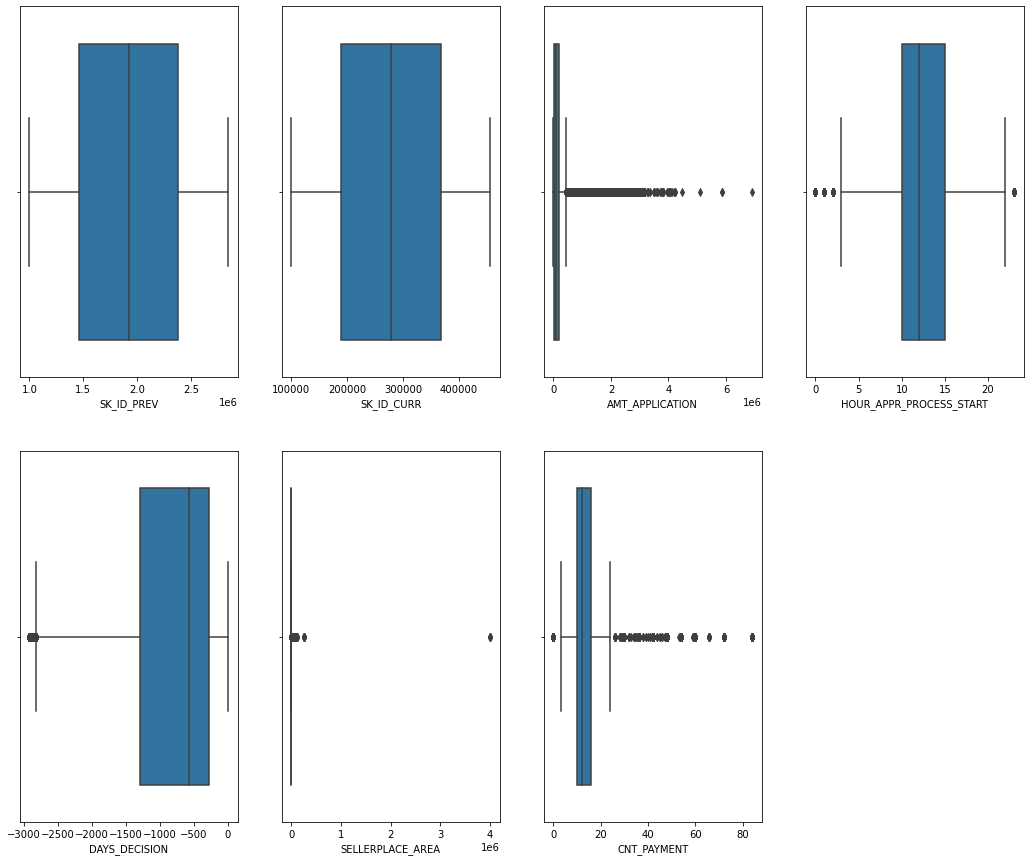

In [69]:
plt.figure(figsize=(18,15))
for column,pos in itertools.zip_longest(num_cols_in_pd,range(len(num_cols_in_pd))):
    plt.subplot(2,4,pos+1)
    ax=sns.boxplot(previous_data[column])
    

### Data Analysis

#### Data Imbalance

In [70]:
target_count = application_data.TARGET.value_counts(normalize=True)
target_count

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

Text(0.5, 1.0, 'Target Distribution')

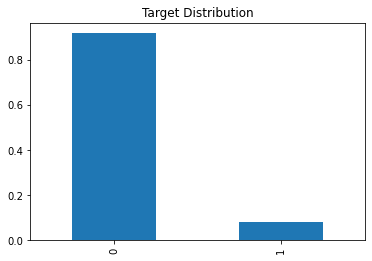

In [176]:
target_count.plot.bar()
plt.title("Target Distribution")

In [74]:
print(f"There is {target_count[0]/sum(target_count)*100} % of Repayers and {target_count[1]/sum(target_count)*100}% of Defaulters")

There is 91.92711805431351 % of Repayers and 8.072881945686495% of Defaulters


##### It shows there is some imbalance in data which is understood as the number of defaulters will be much less as compared to repayers otherwise the bank will go bankrupt.

In [177]:
target_count_pd = previous_data.NAME_CONTRACT_STATUS.value_counts(normalize=True)
target_count_pd

Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: NAME_CONTRACT_STATUS, dtype: float64

Text(0.5, 1.0, 'Loan Staus Distribution')

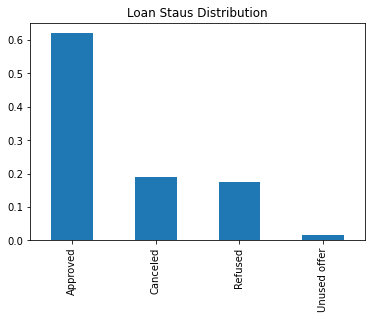

In [178]:
target_count_pd.plot.bar()
plt.title("Loan Staus Distribution")

In [180]:
print(f"There is {target_count_pd[0]/sum(target_count_pd)*100} % of Loan approved by the bank")

There is 62.074740123121956 % of Loan approved by the bank


### Univariate Analysis

### Application_Data

In [75]:
def cat_plot_univariate(df,col):
    df[col].value_counts(normalize=True).plot.bar()
    plt.title(col)
    plt.ylabel('% counts of the attributes')

In [76]:
cat_cols_in_application_data = [cat_col for cat_col in application_data.columns if application_data[cat_col].dtype=='object']
cat_cols_in_application_data

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

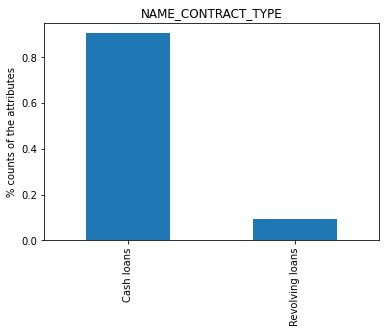

In [77]:
cat_plot_univariate(application_data,'NAME_CONTRACT_TYPE')

##### Insight: Cash loans asked is much more as compared to Revolving Loans

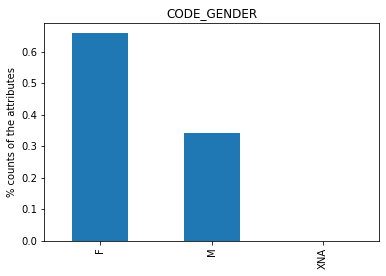

In [78]:
cat_plot_univariate(application_data,'CODE_GENDER')

##### More number of females have asked for loans as compared to males (More than 60% are females)

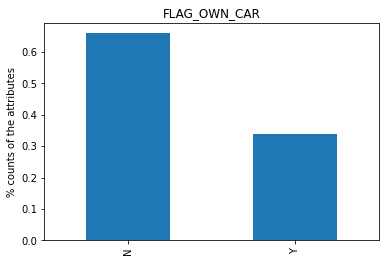

In [79]:
cat_plot_univariate(application_data,'FLAG_OWN_CAR')

##### More than 60% of customers who own a car don't own a car

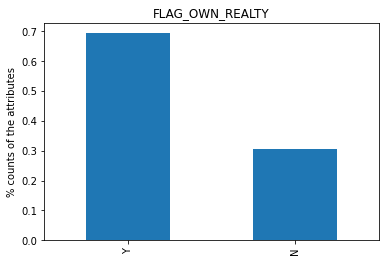

In [80]:
cat_plot_univariate(application_data,'FLAG_OWN_REALTY')

##### Almost 70% of customers own a house or flat. They may have approached to bank for a house loan.

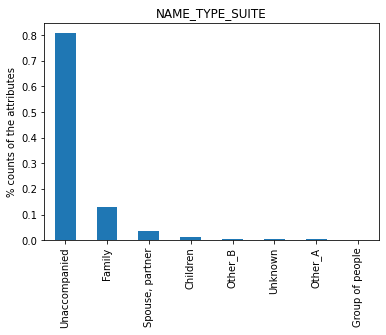

In [81]:
cat_plot_univariate(application_data,'NAME_TYPE_SUITE')

##### Nearly 80% of our customers are unaccommnied when the came to ask for a loan

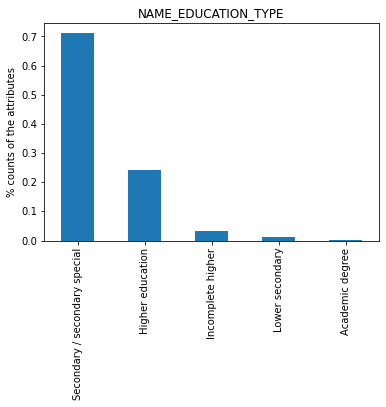

In [82]:
cat_plot_univariate(application_data,'NAME_EDUCATION_TYPE')

##### Almost all the customers are educated atleast at Secondary level

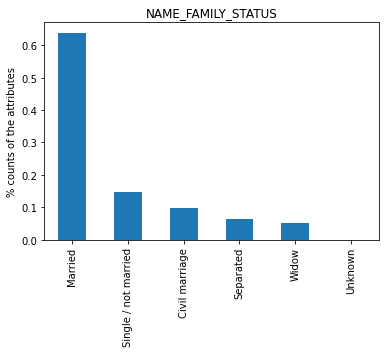

In [83]:
cat_plot_univariate(application_data,'NAME_FAMILY_STATUS')

##### More than 60% of customers are married

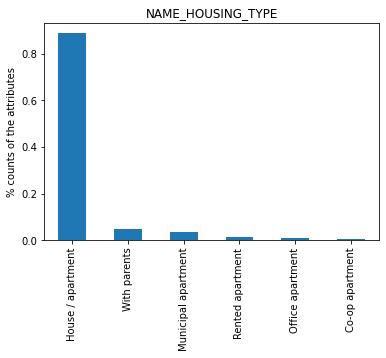

In [84]:
cat_plot_univariate(application_data,'NAME_HOUSING_TYPE')

##### More than 85% customers lives in their own house/apartment

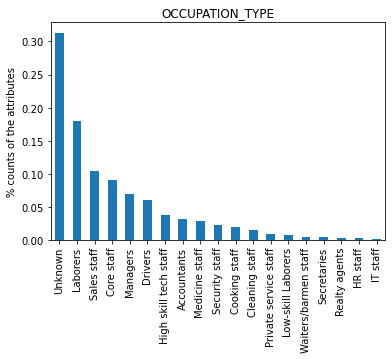

In [85]:
cat_plot_univariate(application_data,'OCCUPATION_TYPE')

##### Most of the customers' Occupation status is Unknown which means they might be unemployed or students. After that Labourers class have asked for most number of loans (Almost 17%)

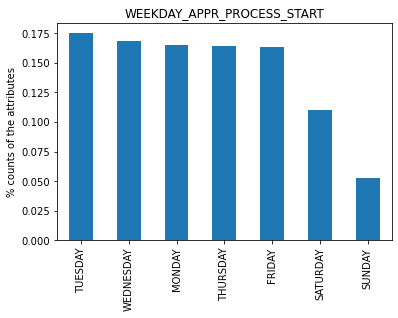

In [86]:
cat_plot_univariate(application_data,'WEEKDAY_APPR_PROCESS_START')

##### Less number loans are applied on weekends as compared to weekdays. This is probably due to bank holidays or vacations

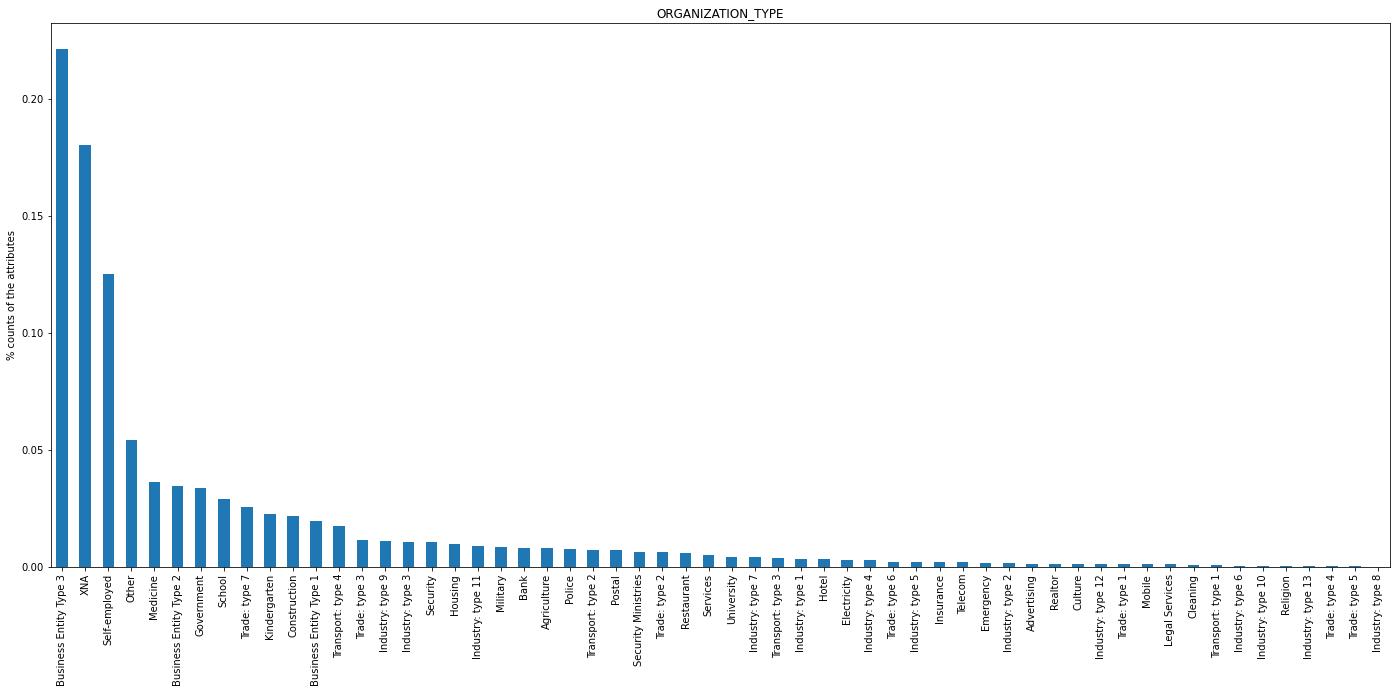

In [87]:
plt.figure(figsize=(24,10))
cat_plot_univariate(application_data,'ORGANIZATION_TYPE')

##### Most number of loans are asked by Business Owners

In [88]:
num_cols_in_application_data = [cols for cols in application_data.columns if (application_data[cols].dtypes == 'int64') | (application_data[cols].dtypes == 'float64')]
num_cols_in_application_data

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_3',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [89]:
len(num_cols_in_application_data)

25

In [90]:
# num_cols_analysis_df = application_data[num_cols_in_application_data]
# num_cols_analysis_df.describe()
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383163e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,2.152665,2.052463,2.031521,12.063419,5.145034e-01,0.515695,1.417523,0.142944,1.400626,0.099717,-962.858788,0.710023,1.778463
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.692890e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.910682,0.509034,0.502737,3.265832,1.908699e-01,0.174736,2.398395,0.446033,2.377224,0.361735,826.808487,0.453752,1.765523
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.000000,1.000000,1.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,2.000000,2.000000,2.000000,10.000000,3.929737e-01,0.417100,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,1.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,2.000000,2.000000,2.000000,12.000000,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,-757.000000,1.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,3.000000,2.000000,2.000000,14.000000,6.634218e-01,0.636376,2.000000,0.000000,2.000000,0.000000,-274.000000,1.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,20.000000,3.000000,3.000000,23.000000,8.549997e-01,0.896010,348.000000,34.000000,344.000000,24.000000,0.000000,1.000000,25.000000


##### We can see some negative values in days columns which doesn't make sense. We can convert them to absolute values.

In [91]:
days_cols = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
application_data[days_cols] = abs(application_data[days_cols])

In [92]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383163e+05,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,2.152665,2.052463,2.031521,12.063419,5.145034e-01,0.515695,1.417523,0.142944,1.400626,0.099717,962.858788,0.710023,1.778463
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.692890e+05,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,0.910682,0.509034,0.502737,3.265832,1.908699e-01,0.174736,2.398395,0.446033,2.377224,0.361735,826.808487,0.453752,1.765523
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,2010.000000,1720.000000,2.000000,2.000000,2.000000,10.000000,3.929737e-01,0.417100,0.000000,0.000000,0.000000,0.000000,274.000000,0.000000,1.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,4504.000000,3254.000000,2.000000,2.000000,2.000000,12.000000,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,757.000000,1.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,7479.500000,4299.000000,3.000000,2.000000,2.000000,14.000000,6.634218e-01,0.636376,2.000000,0.000000,2.000000,0.000000,1570.000000,1.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,24672.000000,7197.000000,20.000000,3.000000,3.000000,23.000000,8.549997e-01,0.896010,348.000000,34.000000,344.000000,24.000000,4292.000000,1.000000,25.000000


##### Insights:
##### i.) A lot of customers doesn't have any children. It might be because most have them are young.
##### ii.) The average amount of income is Rs. 1,68,797.9 with highest being Rs. 11,70,00,000.
##### iii.) The average amount of credit asked is Rs. 5,99,026 with highest being Rs. 40,50,000.

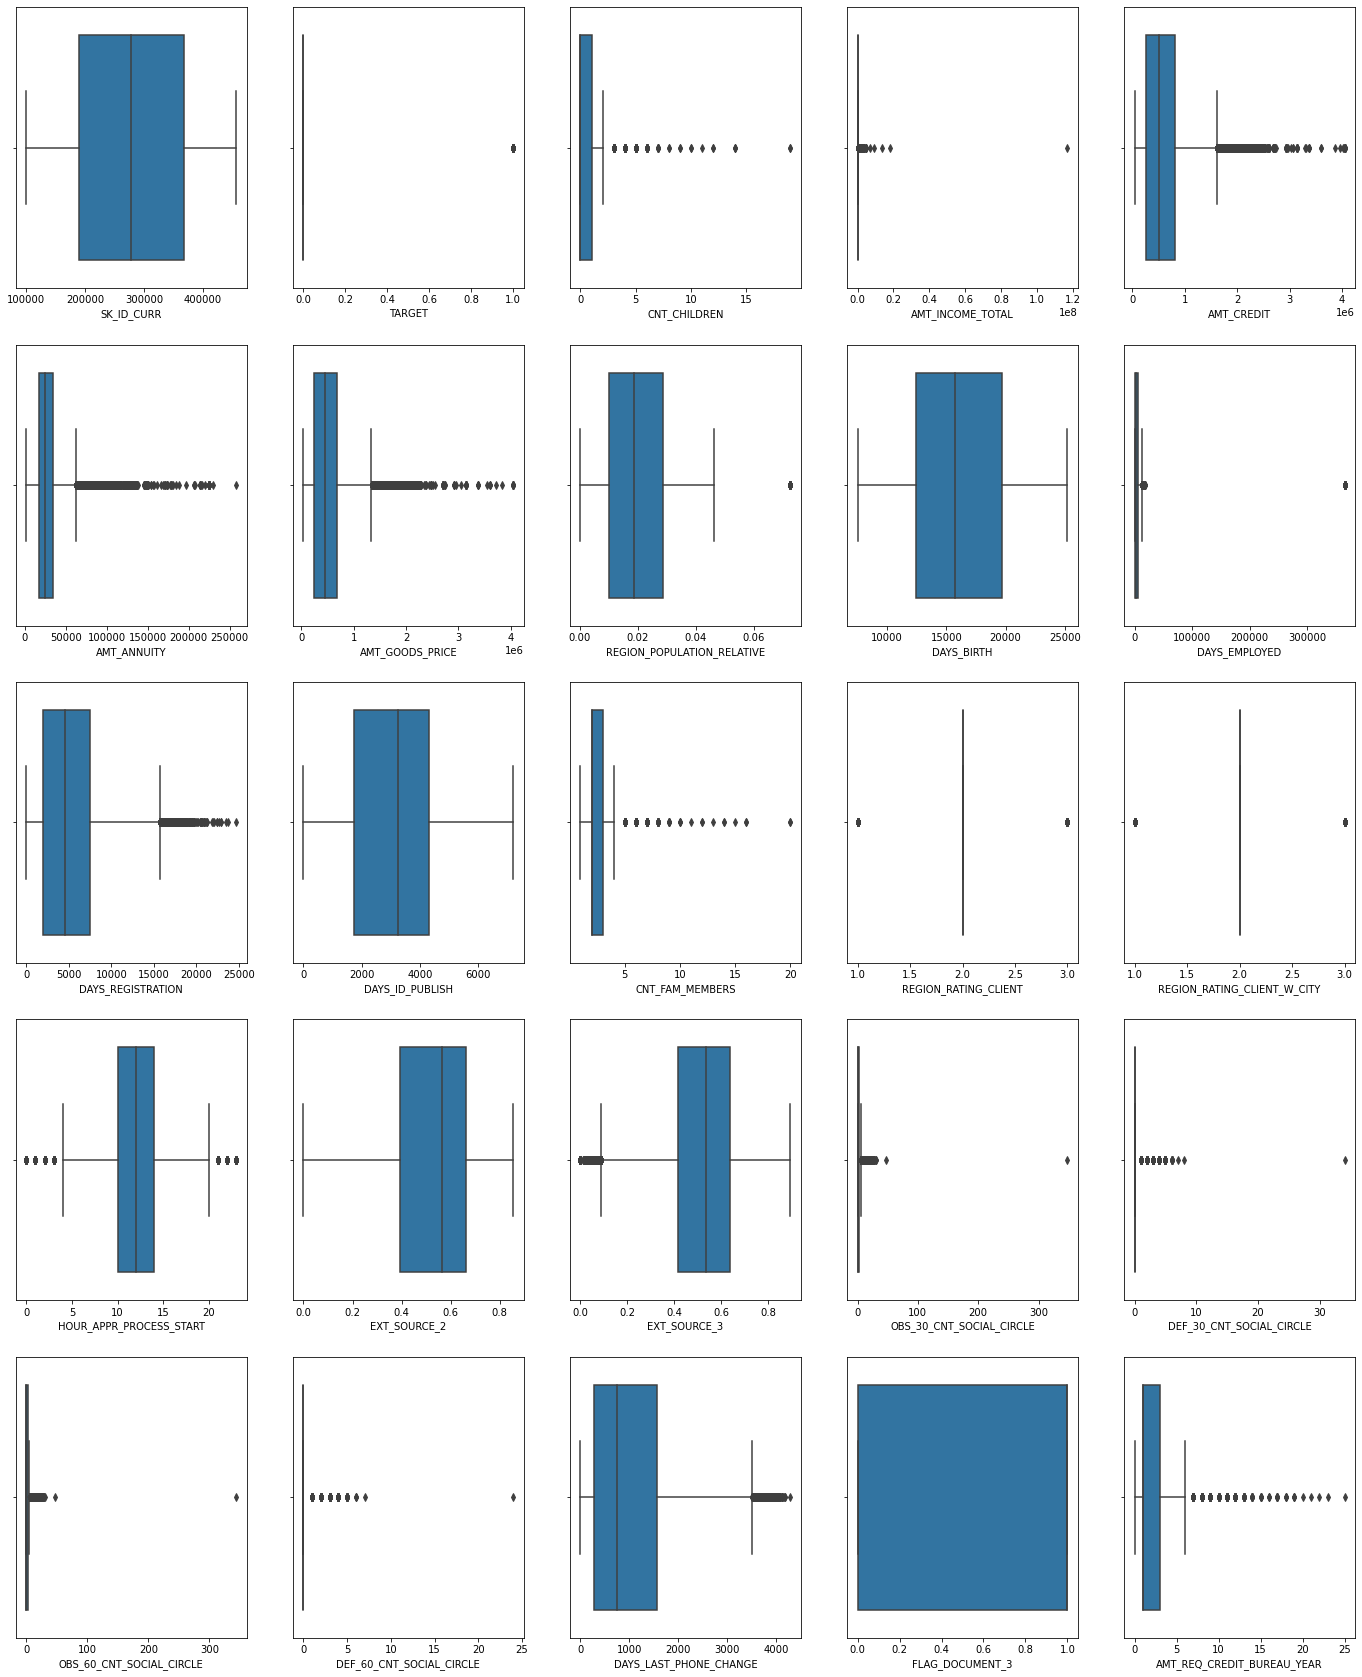

In [93]:
plt.figure(figsize=(24,30))
for col,num in itertools.zip_longest(num_cols_in_application_data,range(len(num_cols_in_application_data))):
    plt.subplot(5,5,num+1)
    ax= sns.boxplot(application_data[col])

##### To analyze age column and amount column further  we can bin them into categories

In [94]:
application_data['Age_Group']= application_data['DAYS_BIRTH']/365
bins = [0,20,30,40,50,60,1000]
labels = ['0-20','20-30','30-40','40-50','50-60','60+']
application_data['Age_Group']=pd.cut(application_data['Age_Group'],bins=bins,labels=labels)
application_data['Age_Group'].value_counts()

30-40    82308
40-50    76541
50-60    68062
20-30    45021
60+      35579
0-20         0
Name: Age_Group, dtype: int64

Text(0.5, 1.0, 'Age Groups')

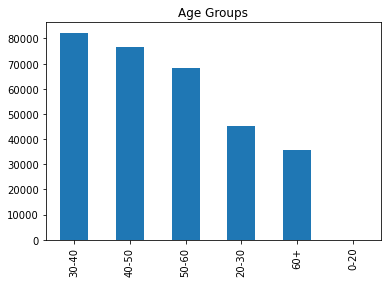

In [181]:
application_data['Age_Group'].value_counts().plot.bar()
plt.title("Age Groups")

In [96]:
application_data['Income_Group']= application_data['AMT_INCOME_TOTAL']/1000
bins = [0,100,1000,2000,3000,4000,5000,10000000]
labels = ['0-1L','1L-10L','10L-20L','20L-30L','30L-40L','40L-50L','50L+']
application_data['Income_Group']=pd.cut(application_data['Income_Group'],bins=bins,labels=labels)
application_data['Income_Group'].value_counts()

1L-10L     243563
0-1L        63698
10L-20L       206
20L-30L        27
30L-40L         8
50L+            5
40L-50L         4
Name: Income_Group, dtype: int64

<AxesSubplot:>

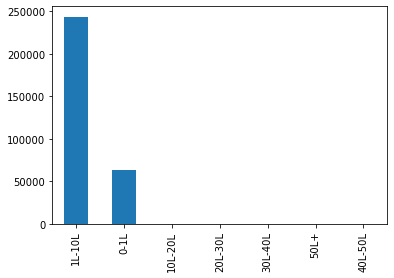

In [97]:
application_data['Income_Group'].value_counts().plot.bar()

In [98]:
application_data['Credit_Group']= application_data['AMT_CREDIT']/1000
bins = [0,100,1000,2000,3000,4000,5000,10000000]
labels = ['0-1L','1L-10L','10L-20L','20L-30L','30L-40L','40L-50L','50L+']
application_data['Credit_Group']=pd.cut(application_data['Credit_Group'],bins=bins,labels=labels)
application_data['Credit_Group'].value_counts()

1L-10L     251522
10L-20L     47956
0-1L         6004
20L-30L      1997
30L-40L        22
40L-50L        10
50L+            0
Name: Credit_Group, dtype: int64

<AxesSubplot:>

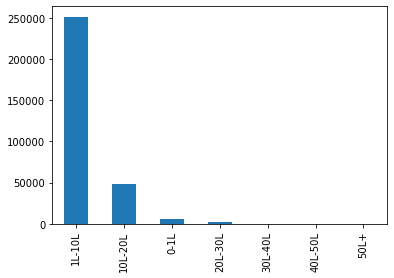

In [99]:
application_data['Credit_Group'].value_counts().plot.bar()

### Previous Data

In [100]:
cat_cols_in_prev_data = [col for col in previous_data.columns if previous_data[col].dtype=='object']
cat_cols_in_prev_data

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [101]:
len(cat_cols_in_prev_data)

14

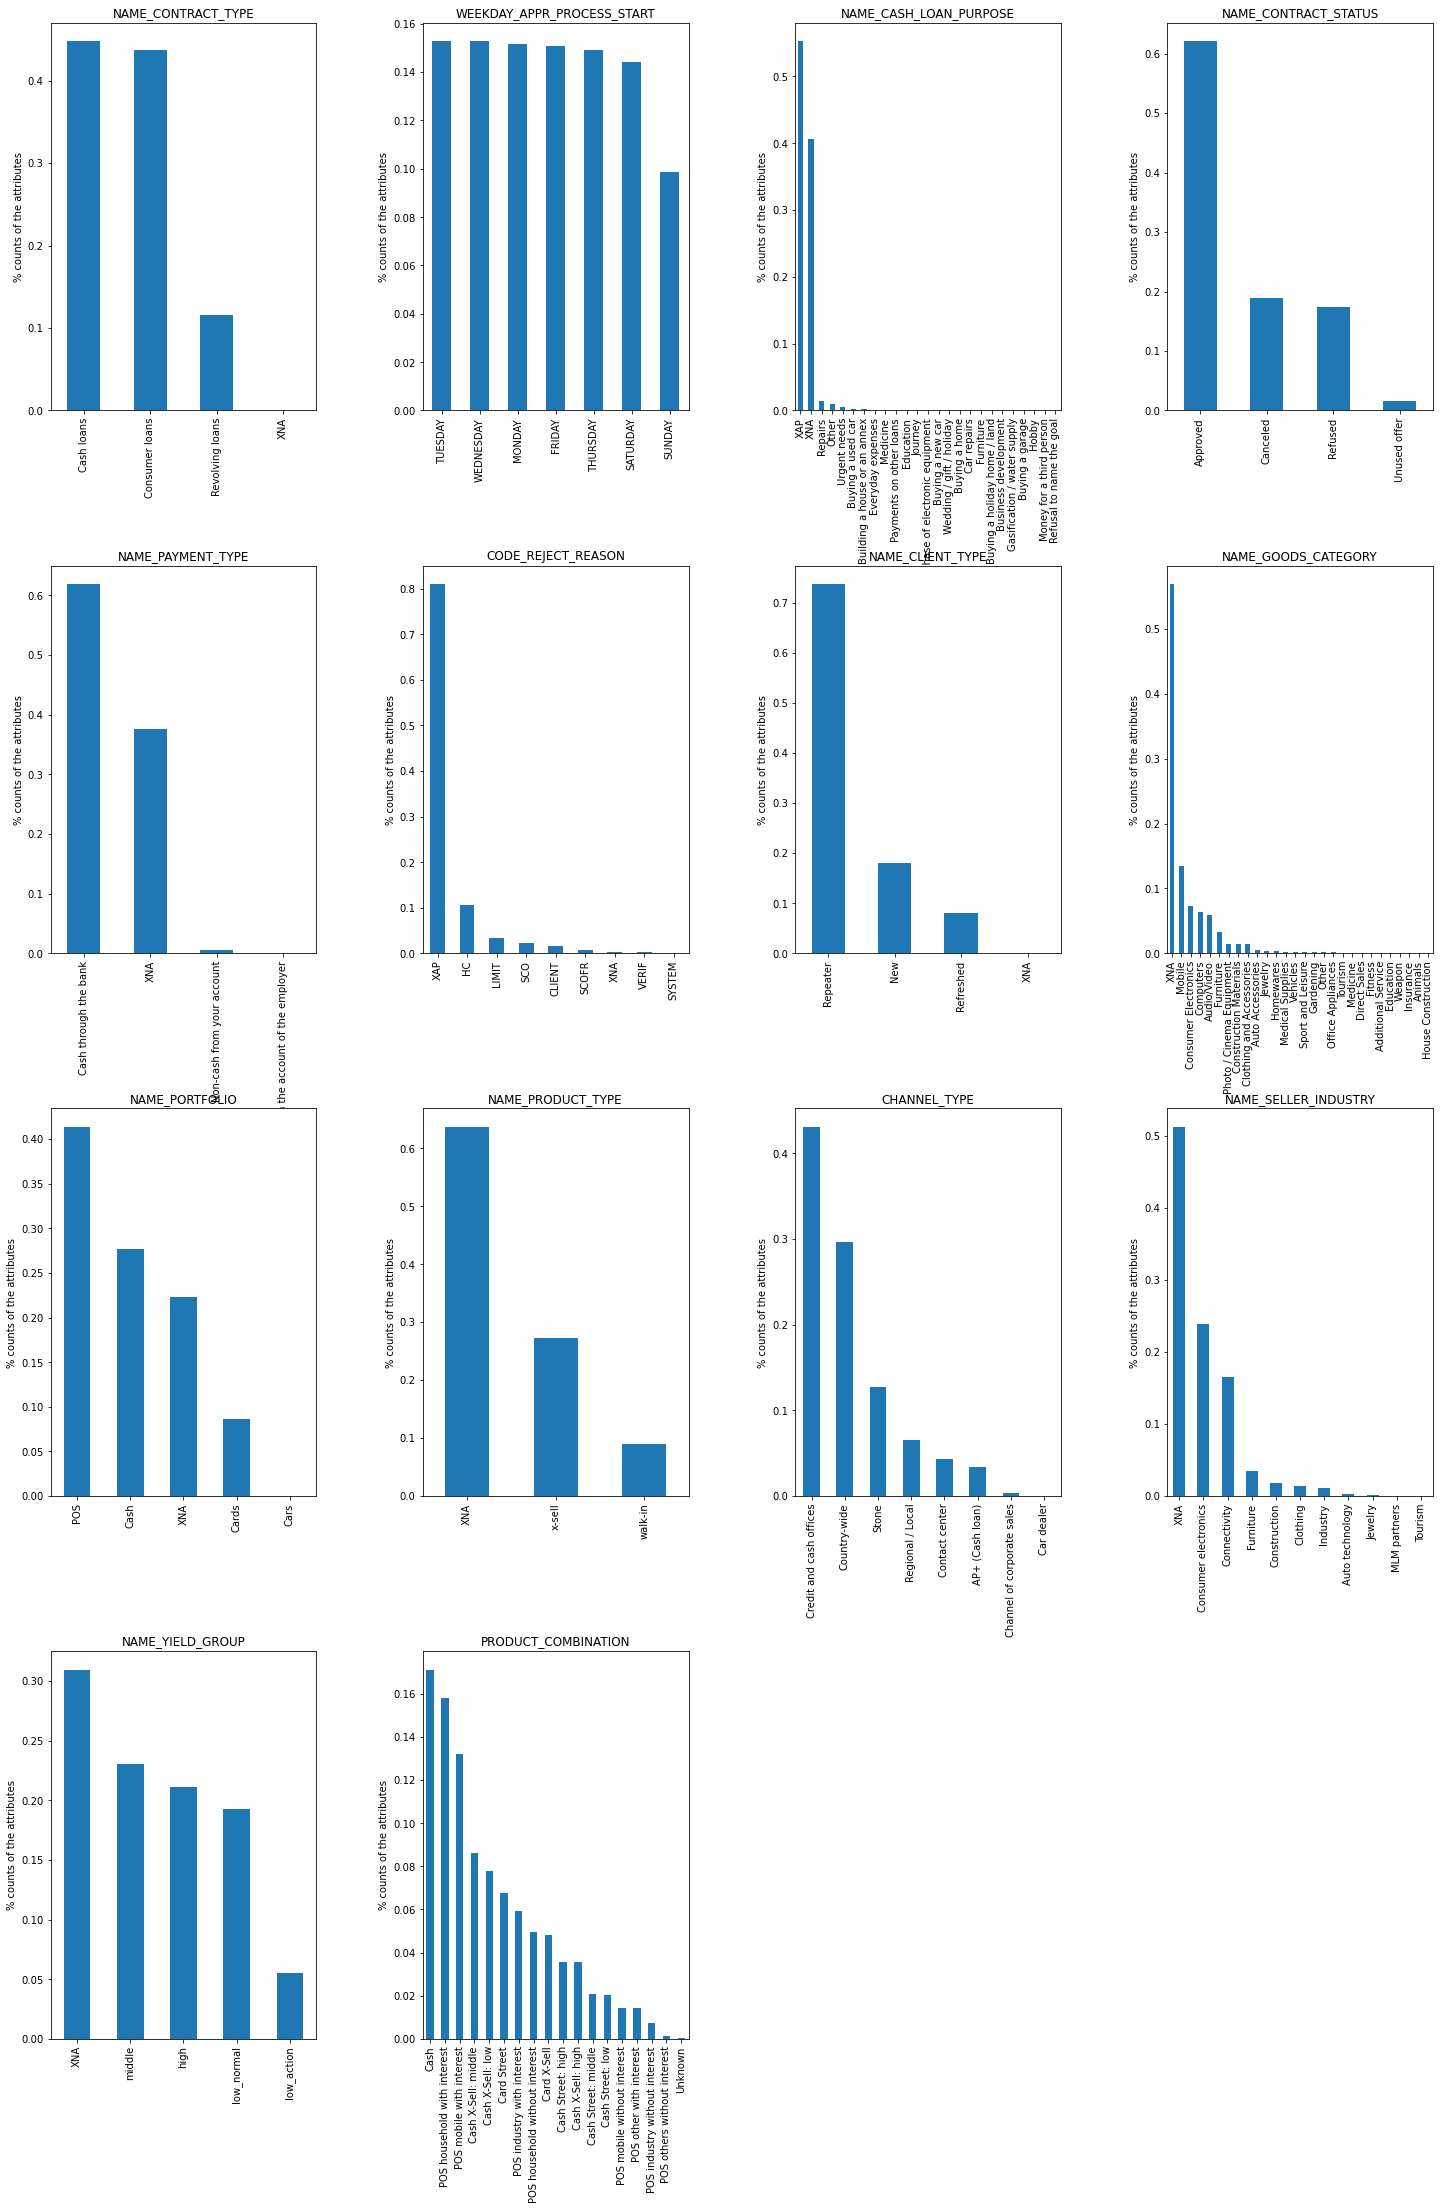

In [102]:
plt.figure(figsize=(24,20))
i=1
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.4,
                    hspace=0.4)
for col in cat_cols_in_prev_data:
    plt.subplot(4,4,i)
    cat_plot_univariate(previous_data,col)
    i+=1

### Insights:
##### i.) The number of Cash loans and Cnsumer loans are almost same. Together combined, they add up to more than 80% of the total loans.
##### ii.) Less number of application are processed on Sunday as compared to any other day of the week.
##### iii.) Most loan  purposes are unknown, but apart from that most of the loan are taken for Repairs.
##### iv.) Above 60% of the loan applications are approved. Almost 20% applications are refused or cancelled each.
##### v.) More than 70% of the clients are repeater while less than 20% are New.
##### vi.) Most of the loans are taken for mobiles. It's only after the unknown category
##### vii.) Most of the previous application is for POS.
##### viii.) The number 1 seller industry is Consumer Electronics only afer Unknown category

In [103]:
num_cols_in_prev_data = [col for col in previous_data.columns if (previous_data[col].dtype=='int64') | (previous_data[col].dtype=='float64')]
num_cols_in_prev_data

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_APPLICATION',
 'HOUR_APPR_PROCESS_START',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT']

In [104]:
previous_data[num_cols_in_prev_data].describe()

,SK_ID_PREV,SK_ID_CURR,AMT_APPLICATION,HOUR_APPR_PROCESS_START,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.923089e+06,2.783572e+05,1.752339e+05,1.248418e+01,-8.806797e+02,3.139511e+02,1.515057e+01
std,5.325980e+05,1.028148e+05,2.927798e+05,3.334028e+00,7.790997e+02,7.127443e+03,1.295220e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,1.872000e+04,1.000000e+01,-1.300000e+03,-1.000000e+00,1.000000e+01
50%,1.923110e+06,2.787145e+05,7.104600e+04,1.200000e+01,-5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384280e+06,3.675140e+05,1.803600e+05,1.500000e+01,-2.800000e+02,8.200000e+01,1.600000e+01
max,2.845382e+06,4.562550e+05,6.905160e+06,2.300000e+01,-1.000000e+00,4.000000e+06,8.400000e+01


##### Insights:
##### i.) The average amount of credit asked is Rs. 1,75,233.9 with highest being Rs. 69,05,10
##### ii.) The average term of previous application is 15.12

In [105]:
previous_data['DAYS_DECISION']=abs(previous_data['DAYS_DECISION'])

In [106]:
previous_data['DAYS_DECISION'].describe()

count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64

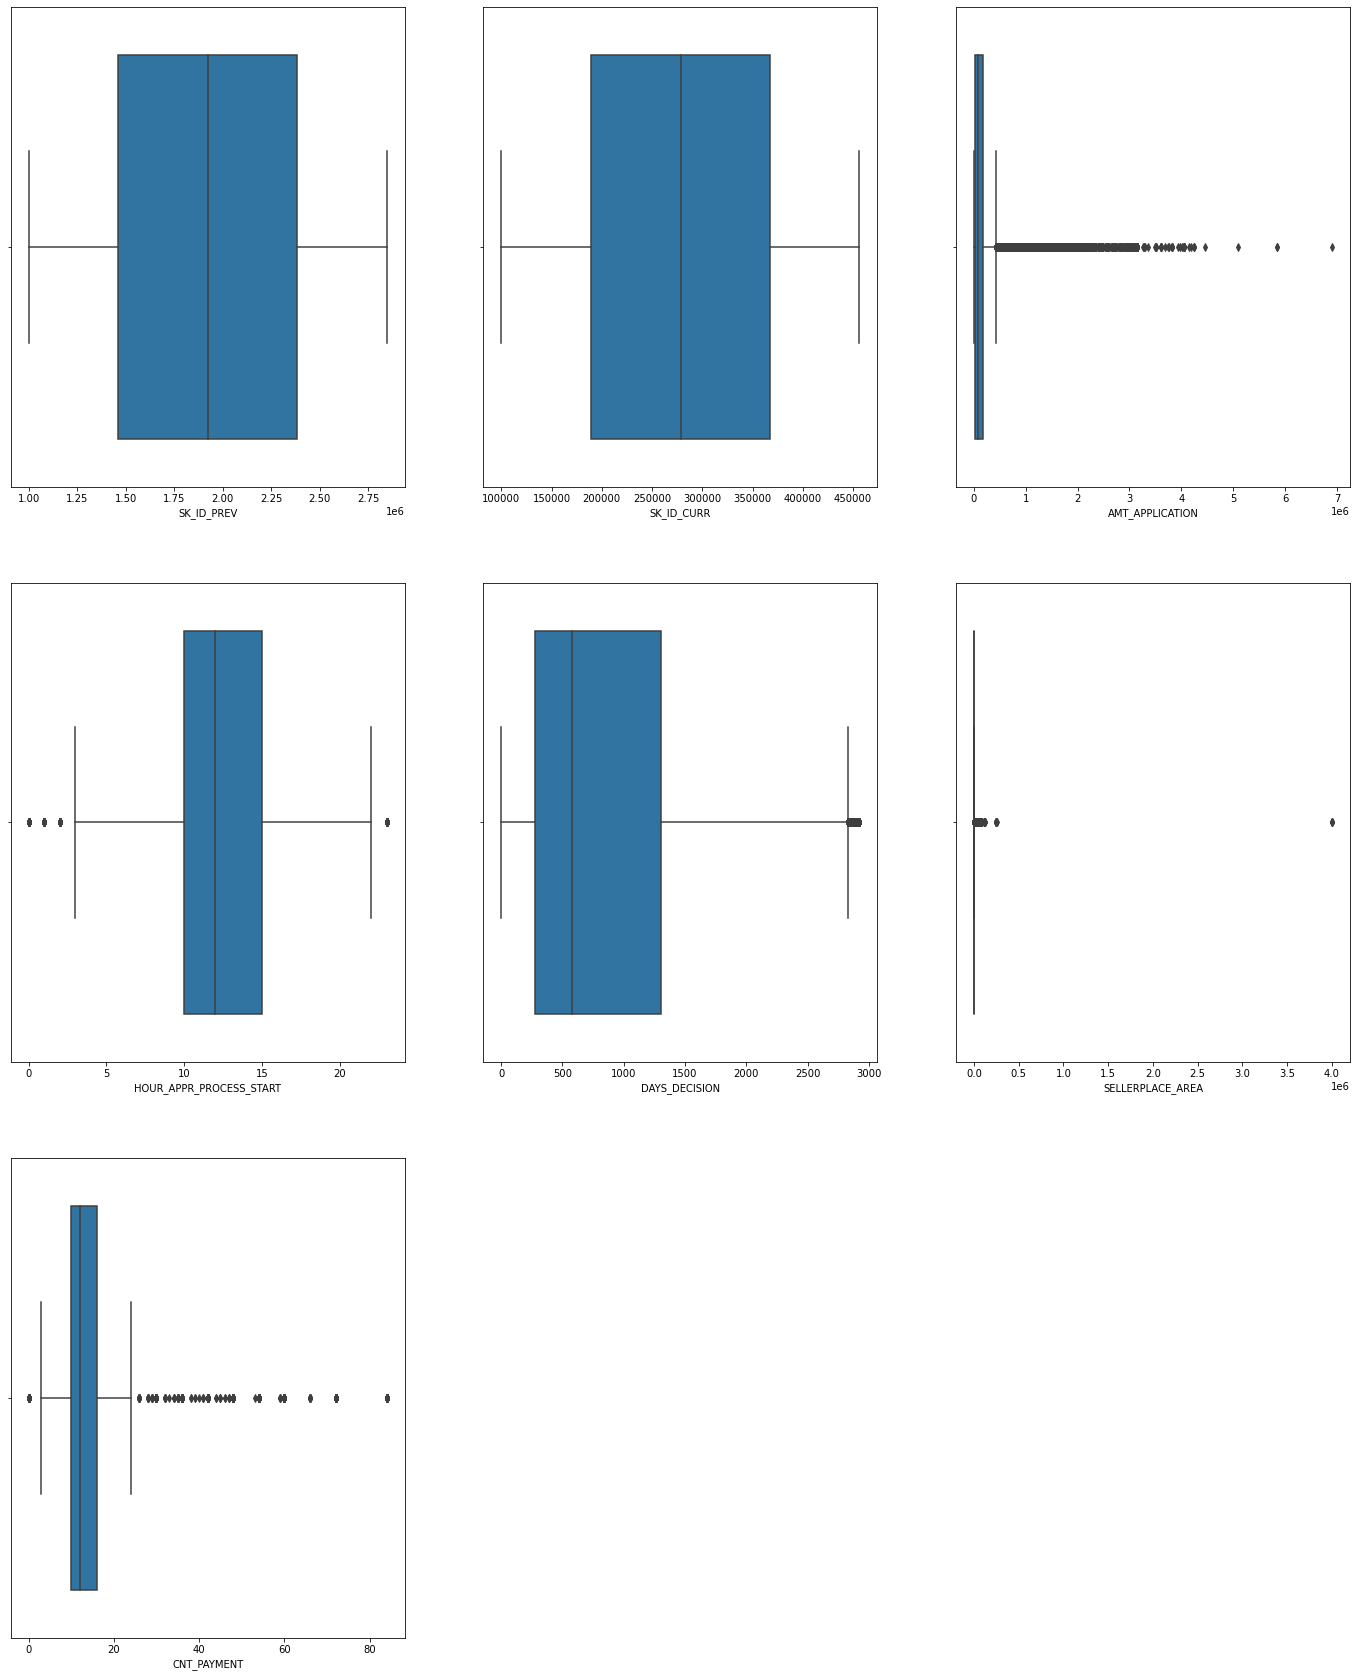

In [107]:
plt.figure(figsize=(24,30))
for col,num in itertools.zip_longest(num_cols_in_prev_data,range(len(num_cols_in_prev_data))):
    plt.subplot(3,3,num+1)
    ax= sns.boxplot(previous_data[col])

##### Insight: The payment term has many outliers

### Bivariate Analysis

### Application Data

In [108]:
cat_cols_in_application_data

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

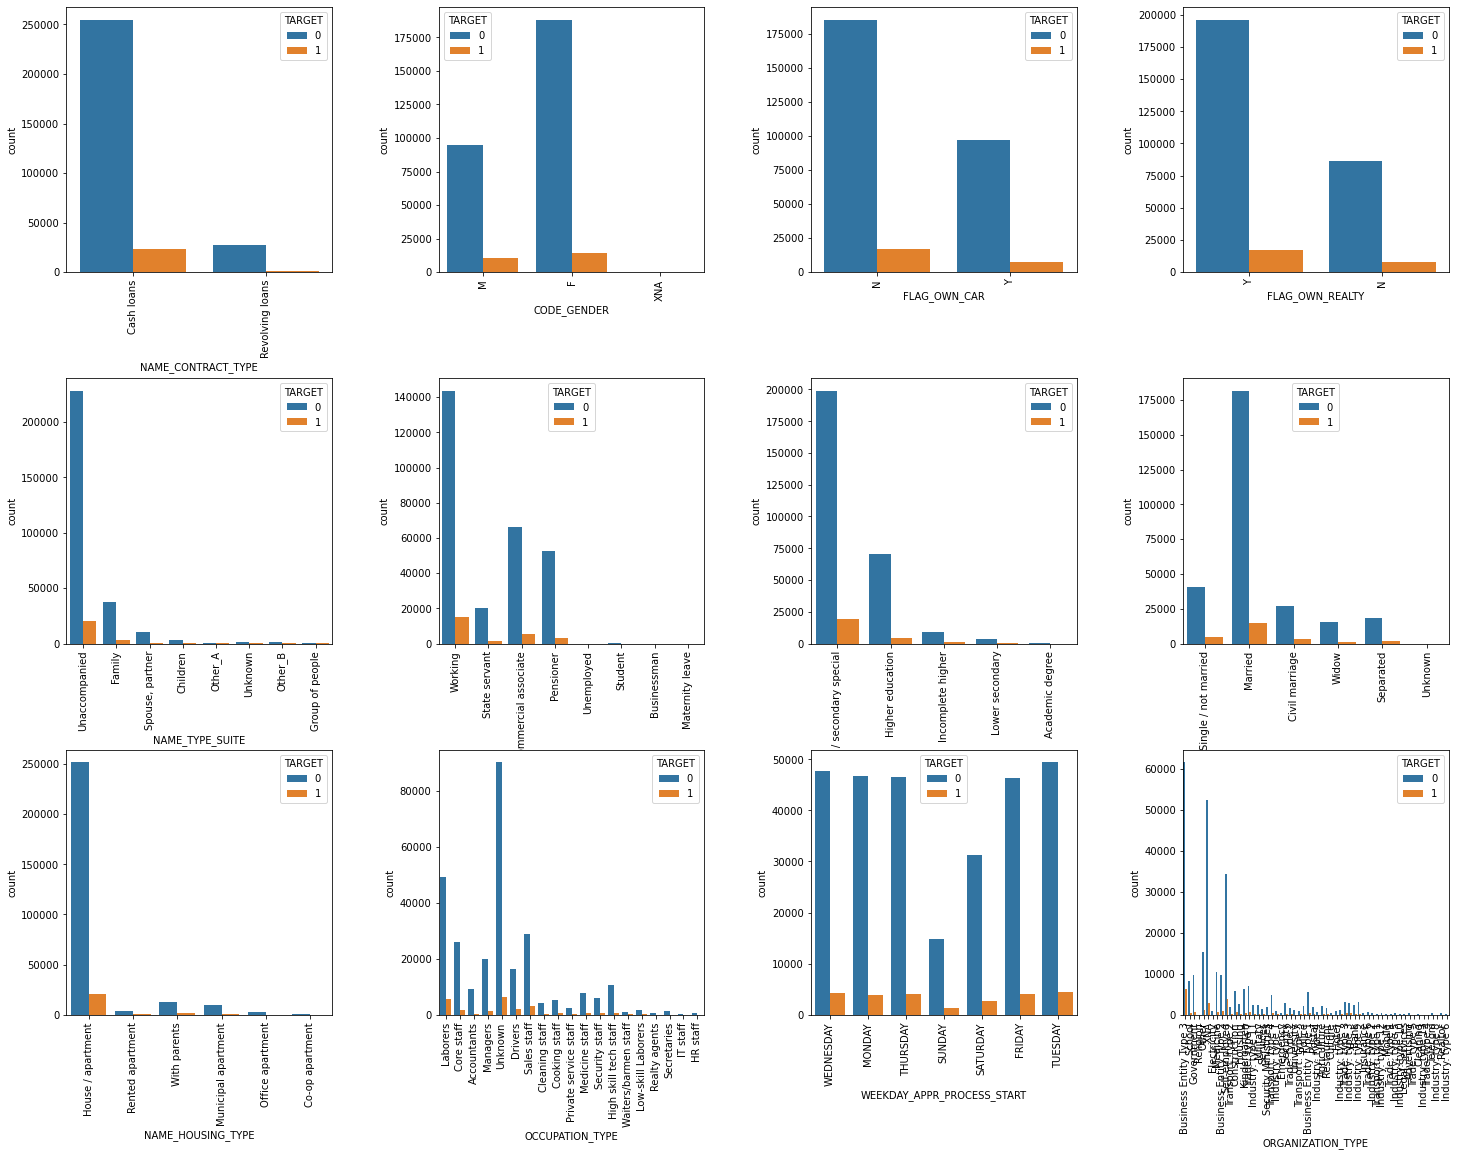

In [109]:
plt.figure(figsize=(24,10))
i=1
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.4,
                    hspace=0.4)
for col in cat_cols_in_application_data:
    plt.subplot(3,4,i)
    plt.xticks(rotation=90)
    sns.countplot(application_data[col],hue=application_data['TARGET'])
    i+=1

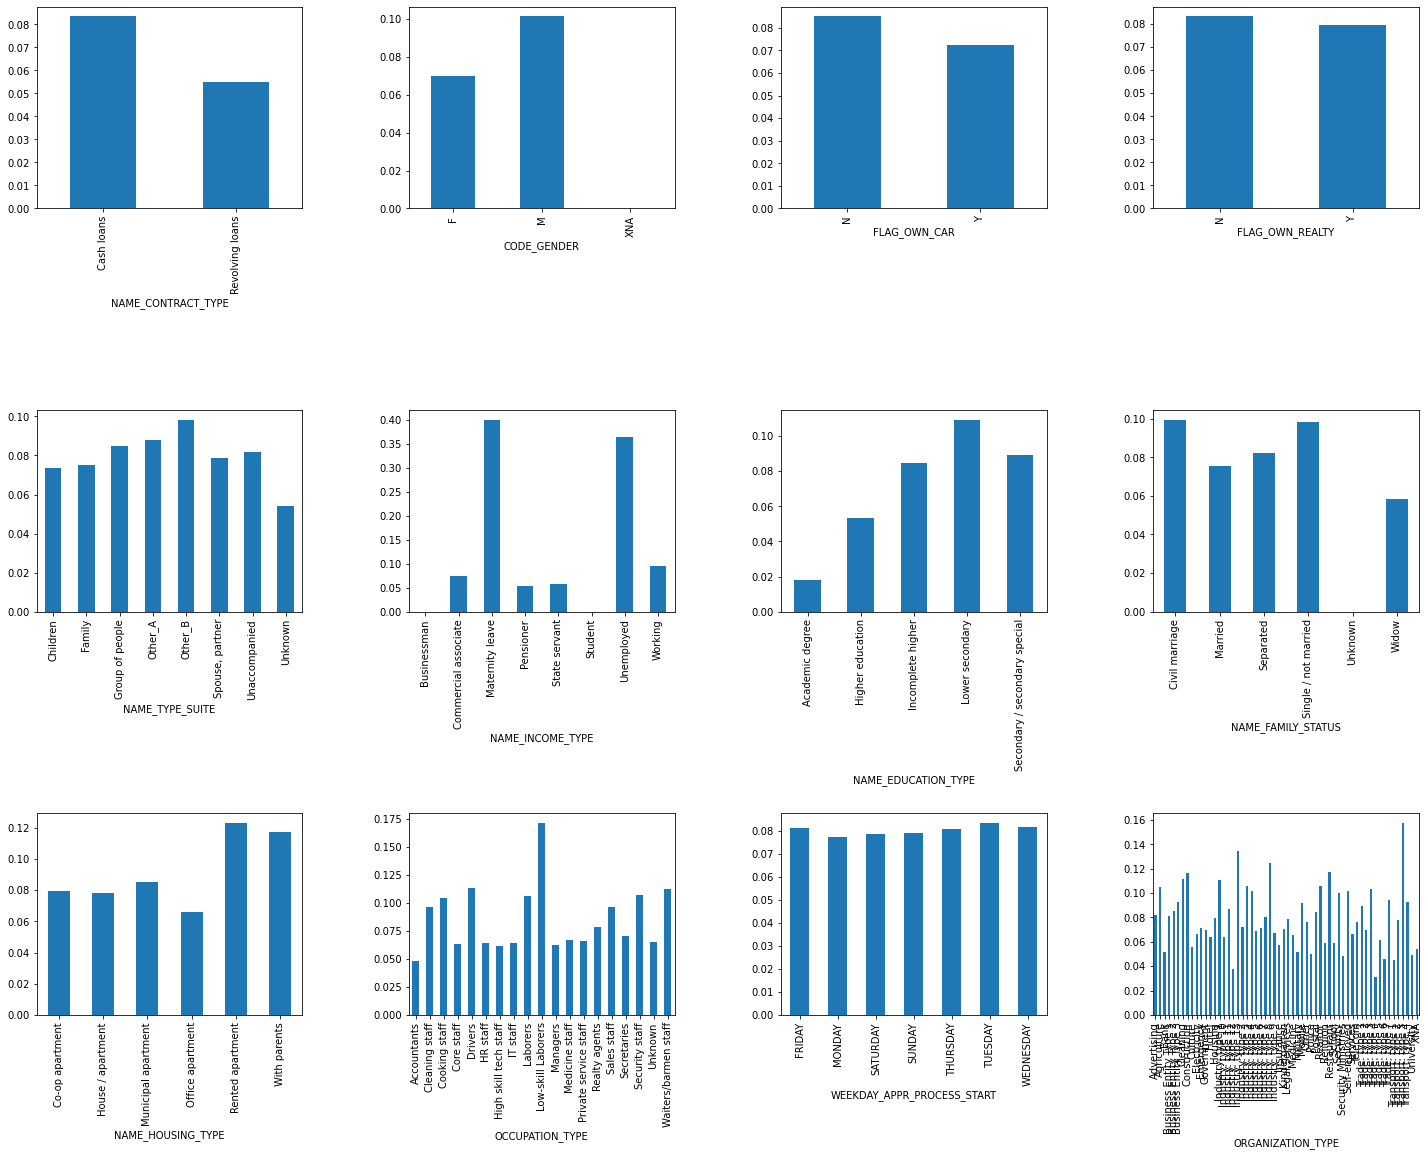

In [110]:
plt.figure(figsize=(24,10))
i=1
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.4,
                    hspace=1)
for col in cat_cols_in_application_data:
    plt.subplot(3,4,i)
    plt.xticks(rotation=90)
    application_data.groupby([col])['TARGET'].mean().plot.bar()
    i+=1

#### Insights:
## Note: All the data is in %
##### i.) The number of defaulters in the cash loan is more as compared to Resolving loans
##### ii.) There are more number of male defaulters (Almost 10%)
##### iii.) There is a slight no. of more defaulters who don't own a car or realty as compared to who own these.
##### iv.) The people who are on Maternity Leave and Unemployed are among the highest no. of defaulters. Above 35% of people who come under these categories are defaulters
##### v.) The people with lower education i.e Lower Secondary are the highest defaulters in the education class.
##### vi.) Theere are more than 10% defaulters among people who are civil married and single.
##### vii.) The people who either live in Rented Apartment or with parents tend to default more with Around 12% default rate.
##### viii.) Low skilled Labourers have the highest default rate with approximately 17.5%

<AxesSubplot:xlabel='ORGANIZATION_TYPE'>

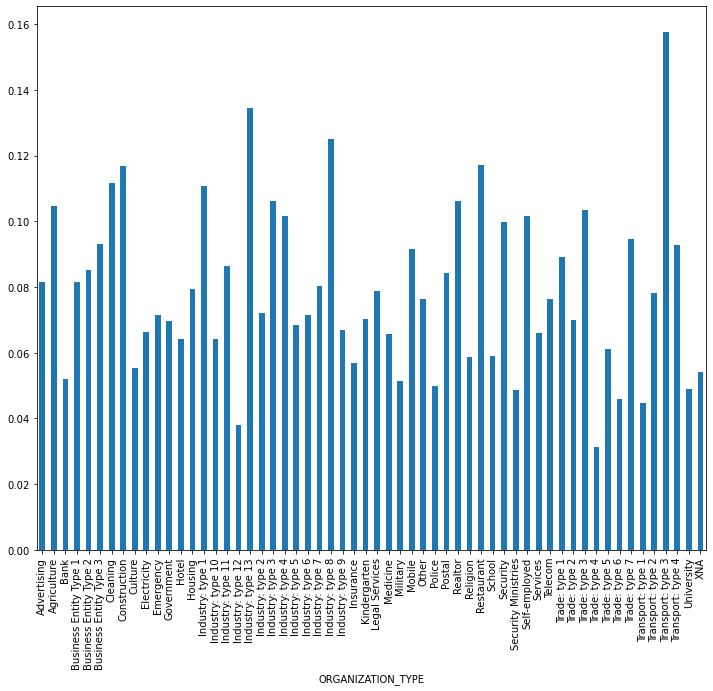

In [111]:
plt.figure(figsize=(12,10))
application_data.groupby(['ORGANIZATION_TYPE'])['TARGET'].mean().plot.bar()

##### People in organization Transport: type 3 have highest rate of defaulters.

<AxesSubplot:xlabel='Age_Group'>

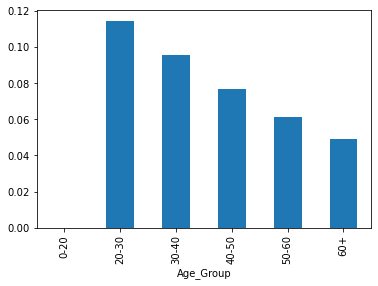

In [112]:
application_data.groupby(['Age_Group'])['TARGET'].mean().plot.bar()

##### The people in age group with 20-30 have highest default rate

<AxesSubplot:xlabel='Income_Group'>

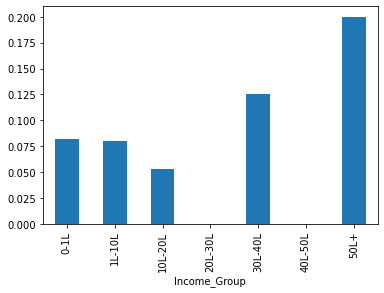

In [113]:
application_data.groupby(['Income_Group'])['TARGET'].mean().plot.bar()

##### Surprisingly the people who earn more than 50L+ have the highest default rate. This may be because of the large loan amount

<AxesSubplot:xlabel='Credit_Group'>

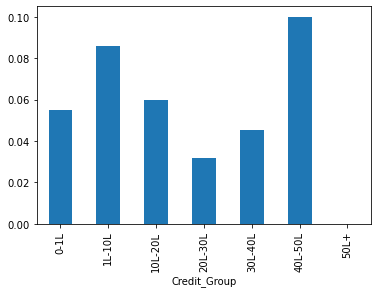

In [114]:
application_data.groupby(['Credit_Group'])['TARGET'].mean().plot.bar()

##### The loans which are in range 40L-50L are defaulted more 

<AxesSubplot:xlabel='CNT_CHILDREN'>

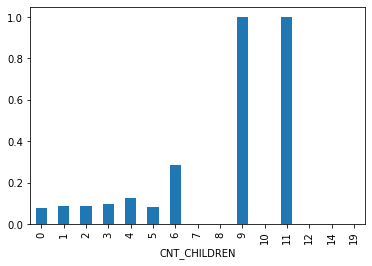

In [115]:
application_data.groupby(['CNT_CHILDREN'])['TARGET'].mean().plot.bar()

##### The people with 9 or more number of people are usually defaulters

### Previous Data

In [141]:
cat_cols_in_prev_data

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

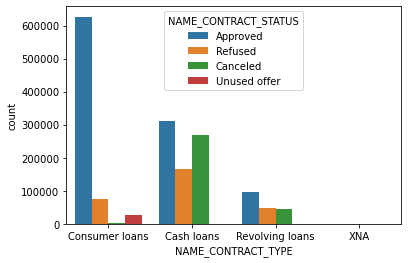

In [127]:
sns.countplot(previous_data['NAME_CONTRACT_TYPE'],hue=previous_data['NAME_CONTRACT_STATUS'])

##### Most of the Consumer loans are approved while there are varieties in Cash loans and Revolving loans

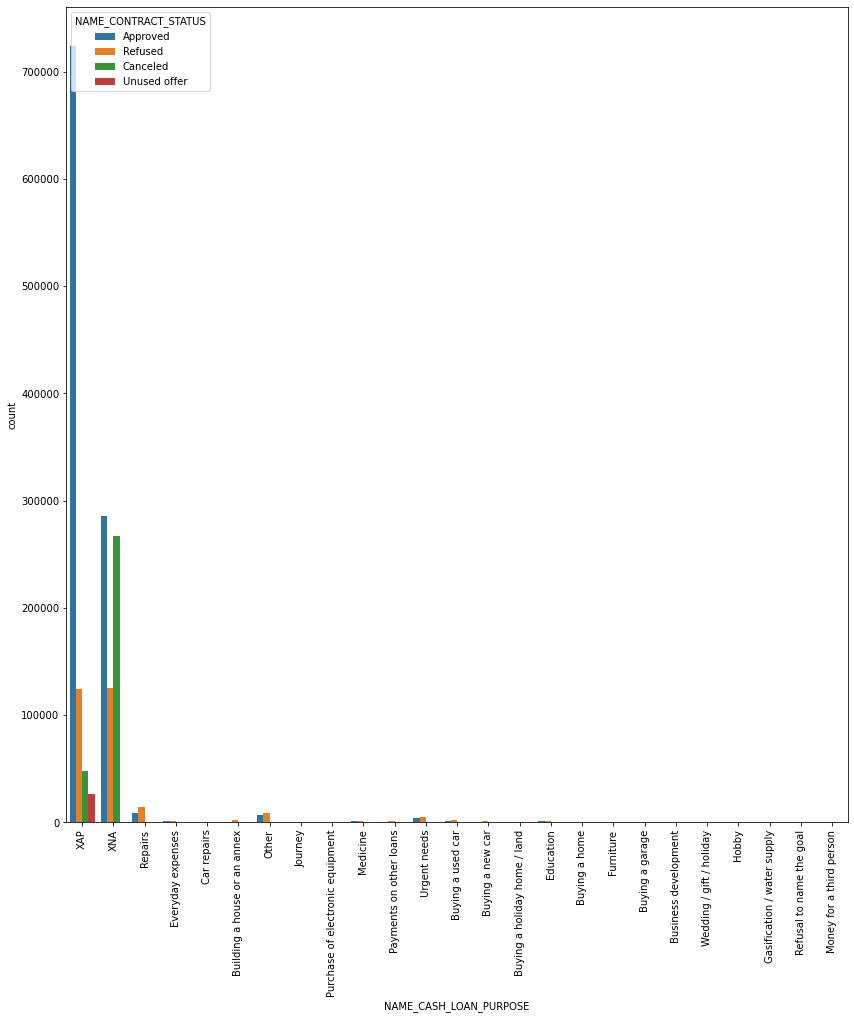

In [131]:
plt.figure(figsize=(14,15))
sns.countplot(previous_data['NAME_CASH_LOAN_PURPOSE'],hue=previous_data['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=90)
plt.show()

##### Most of the loan purpose is unknown but still the loans are approved

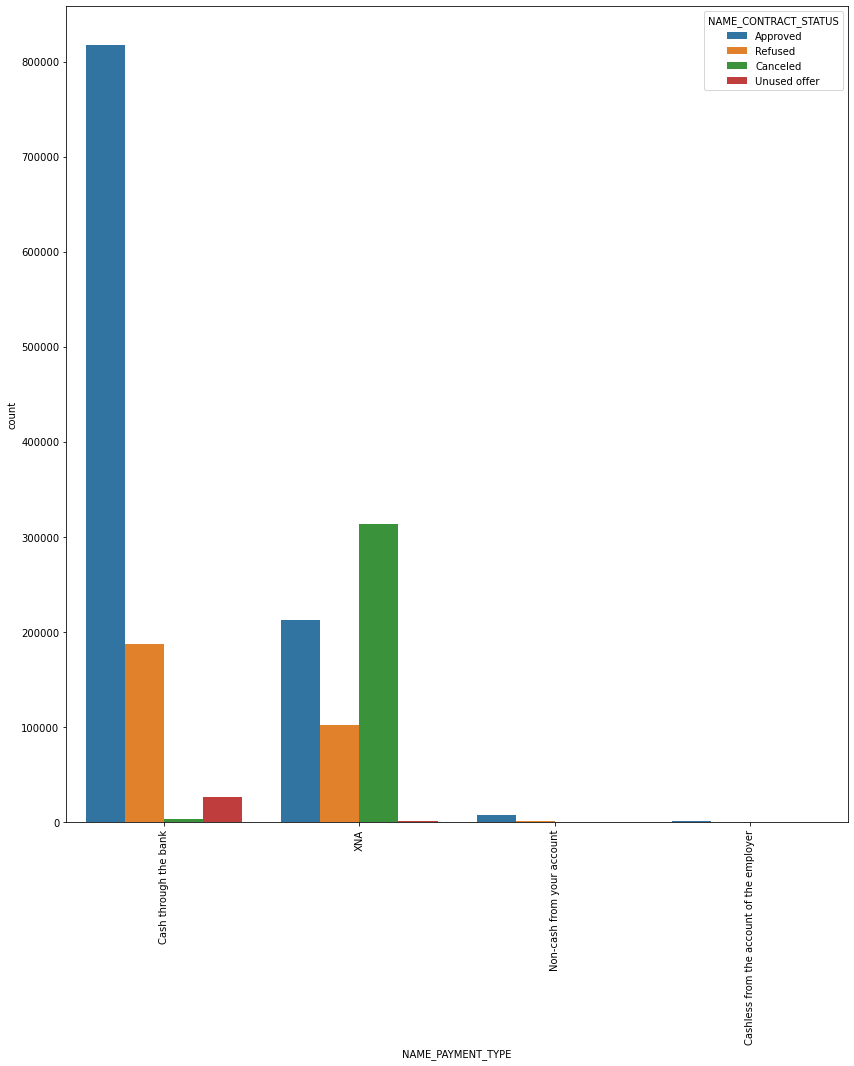

In [132]:
plt.figure(figsize=(14,15))
sns.countplot(previous_data['NAME_PAYMENT_TYPE'],hue=previous_data['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=90)
plt.show()

##### Most of the loans with Payment type as Cash through the bank are approved

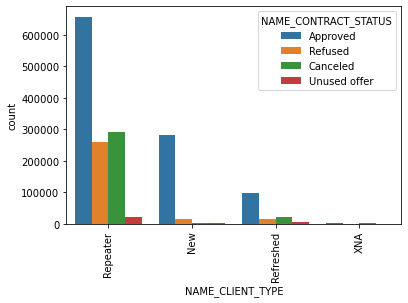

In [134]:
#plt.figure(figsize=(14,15))
sns.countplot(previous_data['NAME_CLIENT_TYPE'],hue=previous_data['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=90)
plt.show()

##### Most of the clients are repeater. And their loans are approved more as compared to others

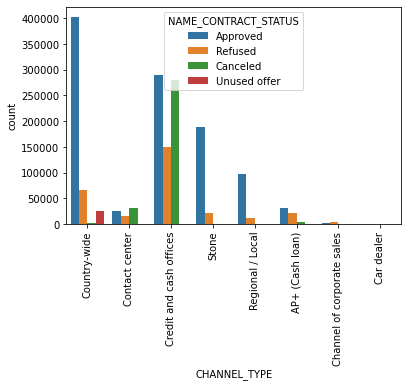

In [135]:
#plt.figure(figsize=(14,15))
sns.countplot(previous_data['CHANNEL_TYPE'],hue=previous_data['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=90)
plt.show()

##### Many loans are rejected where channel type is Credit and Cash officers

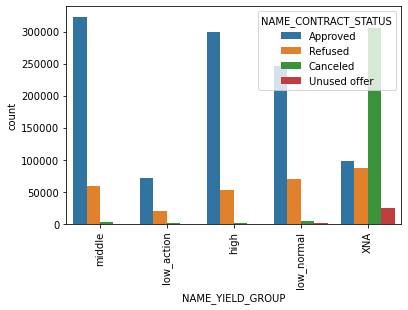

In [136]:
#plt.figure(figsize=(14,15))
sns.countplot(previous_data['NAME_YIELD_GROUP'],hue=previous_data['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=90)
plt.show()

##### Many loan applications are rejected if the interest rates are unknown. Sounds odd

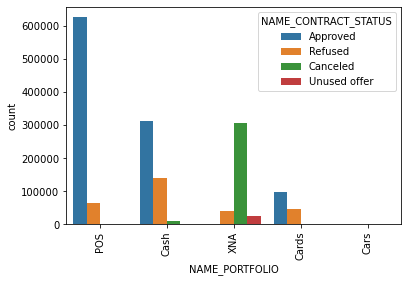

In [139]:
#plt.figure(figsize=(14,15))
sns.countplot(previous_data['NAME_PORTFOLIO'],hue=previous_data['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=90)
plt.show()

##### Most % of POS applications are Approved

In [140]:
num_cols_in_prev_data

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_APPLICATION',
 'HOUR_APPR_PROCESS_START',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT']

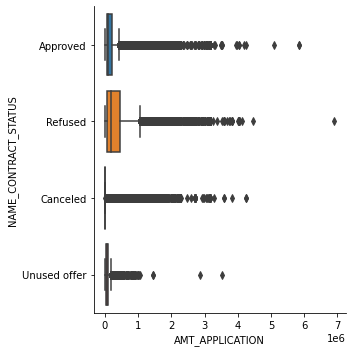

In [145]:
sns.catplot(data=previous_data, x="AMT_APPLICATION", y="NAME_CONTRACT_STATUS", kind="box")

##### The application where amount  is small is small are usually approved. The median amount of rejected application id slightly higher

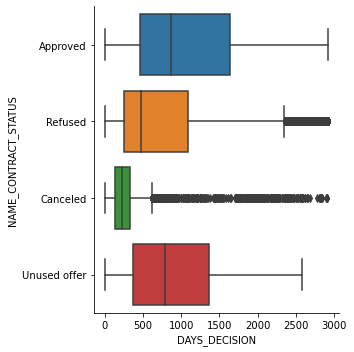

In [146]:
sns.catplot(data=previous_data, x="DAYS_DECISION", y="NAME_CONTRACT_STATUS", kind="box")

##### Usually approval process takes more number of days than refused application. 

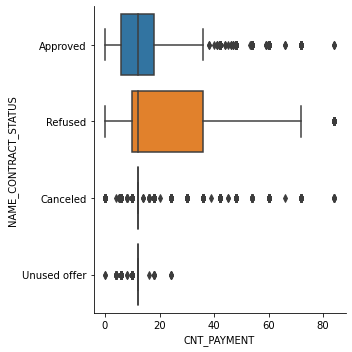

In [148]:
sns.catplot(data=previous_data, x="CNT_PAYMENT", y="NAME_CONTRACT_STATUS", kind="box")

##### The terms with higher terms are rejected often

### Merged Data

In [150]:
merged_data = pd.merge(previous_data, application_data, how='inner', on='SK_ID_CURR')
merged_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_APPLICATION,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_YEAR,Age_Group,Income_Group,Credit_Group
0,2030495,271877,Consumer loans,17145.0,SATURDAY,15,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,0,Cash loans,F,N,Y,1,225000.0,533668.5,25803.0,477000.0,Unaccompanied,State servant,Incomplete higher,Married,House / apartment,0.046220,14443,7392,8447.0,4120,Unknown,3.0,1,1,TUESDAY,17,Military,0.683797,0.535276,3.0,0.0,3.0,0.0,548.0,0,0.0,30-40,1L-10L,1L-10L
1,1696966,271877,Consumer loans,1800000.0,SATURDAY,18,XAP,Refused,472,Cash through the bank,SCO,Repeater,Clothing and Accessories,POS,XNA,Regional / Local,55,Furniture,36.0,low_normal,POS industry with interest,0,Cash loans,F,N,Y,1,225000.0,533668.5,25803.0,477000.0,Unaccompanied,State servant,Incomplete higher,Married,House / apartment,0.046220,14443,7392,8447.0,4120,Unknown,3.0,1,1,TUESDAY,17,Military,0.683797,0.535276,3.0,0.0,3.0,0.0,548.0,0,0.0,30-40,1L-10L,1L-10L
2,2154916,271877,Consumer loans,108400.5,SUNDAY,14,XAP,Approved,548,Cash through the bank,XAP,New,Furniture,POS,XNA,Stone,196,Furniture,12.0,middle,POS industry with interest,0,Cash loans,F,N,Y,1,225000.0,533668.5,25803.0,477000.0,Unaccompanied,State servant,Incomplete higher,Married,House / apartment,0.046220,14443,7392,8447.0,4120,Unknown,3.0,1,1,TUESDAY,17,Military,0.683797,0.535276,3.0,0.0,3.0,0.0,548.0,0,0.0,30-40,1L-10L,1L-10L
3,2802425,108129,Cash loans,607500.0,THURSDAY,11,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,0,Revolving loans,F,N,N,0,90000.0,135000.0,6750.0,135000.0,Family,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,21335,1255,5455.0,4263,Private service staff,2.0,2,2,SUNDAY,10,Self-employed,0.663524,0.535276,0.0,0.0,0.0,0.0,517.0,0,1.0,50-60,0-1L,1L-10L
4,1536272,108129,Cash loans,450000.0,WEDNESDAY,9,XNA,Approved,515,XNA,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.0,low_normal,Cash X-Sell: low,0,Revolving loans,F,N,N,0,90000.0,135000.0,6750.0,135000.0,Family,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,21335,1255,5455.0,4263,Private service staff,2.0,2,2,SUNDAY,10,Self-employed,0.663524,0.535276,0.0,0.0,0.0,0.0,517.0,0,1.0,50-60,0-1L,1L-10L


In [151]:
merged_data.shape

(1413701, 60)

In [152]:
merged_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_APPLICATION,HOUR_APPR_PROCESS_START_x,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_y,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_YEAR
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413608e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06
mean,1.922744e+06,2.784813e+05,1.752436e+05,1.247893e+01,8.803670e+02,3.149878e+02,1.517141e+01,8.655296e-02,4.048933e-01,1.733160e+05,5.875537e+05,2.701702e+04,5.276522e+05,2.074985e-02,1.632105e+04,7.266347e+04,5.003233e+03,3.034563e+03,2.150501e+00,2.059638e+00,2.037603e+00,1.198433e+01,5.114978e-01,4.974956e-01,1.540740e+00,1.537008e-01,1.522906e+00,1.078021e-01,1.084701e+03,7.385600e-01,2.691239e+00
std,5.327153e+05,1.028118e+05,2.936222e+05,3.331474e+00,7.835402e+02,7.695082e+03,1.299505e+01,2.811789e-01,7.173454e-01,1.985734e+05,3.849173e+05,1.395116e+04,3.531028e+05,1.334702e-02,4.344557e+03,1.433374e+05,3.551051e+03,1.507376e+03,9.006787e-01,4.957797e-01,4.886431e-01,3.232181e+00,1.910056e-01,1.797586e-01,2.528944e+00,4.654353e-01,2.507192e+00,3.786711e-01,7.999369e+02,4.394192e-01,2.157176e+00
min,1.000001e+06,1.000020e+05,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,7.489000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,8.173617e-08,5.272652e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.461346e+06,1.893640e+05,1.975050e+04,1.000000e+01,2.710000e+02,-1.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,1.125000e+05,2.700000e+05,1.682100e+04,2.385000e+05,1.003200e-02,1.273900e+04,1.042000e+03,2.001000e+03,1.783000e+03,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+01,3.893855e-01,3.807997e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.960000e+02,0.000000e+00,1.000000e+00
50%,1.922698e+06,2.789920e+05,7.087050e+04,1.200000e+01,5.820000e+02,4.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,1.575000e+05,5.084955e+05,2.492550e+04,4.500000e+05,1.885000e-02,1.604400e+04,2.401000e+03,4.508000e+03,3.330000e+03,2.000000e+00,2.000000e+00,2.000000e+00,1.200000e+01,5.630477e-01,5.352763e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.011000e+03,1.000000e+00,2.000000e+00
75%,2.384012e+06,3.675560e+05,1.800000e+05,1.500000e+01,1.313000e+03,8.500000e+01,1.800000e+01,0.000000e+00,1.000000e+00,2.070000e+05,8.079840e+05,3.454200e+04,6.795000e+05,2.866300e-02,1.998000e+04,6.313000e+03,7.510000e+03,4.319000e+03,3.000000e+00,2.000000e+00,2.000000e+00,1.400000e+01,6.605643e-01,6.212263e-01,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.683000e+03,1.000000e+00,4.000000e+00
max,2.845381e+06,4.562550e+05,5.850000e+06,2.300000e+01,2.922000e+03,4.000000e+06,8.400000e+01,1.000000e+00,1.900000e+01,1.170000e+08,4.050000e+06,2.250000e+05,4.050000e+06,7.250800e-02,2.520100e+04,3.652430e+05,2.467200e+04,7.197000e+03,2.000000e+01,3.000000e+00,3.000000e+00,2.300000e+01,8.549997e-01,8.960095e-01,3.480000e+02,3.400000e+01,3.440000e+02,2.400000e+01,4.292000e+03,1.000000e+00,2.500000e+01


In [182]:
merged_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 60 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_PREV                    1413701 non-null  int64   
 1   SK_ID_CURR                    1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  object  
 3   AMT_APPLICATION               1413701 non-null  float64 
 4   WEEKDAY_APPR_PROCESS_START_x  1413701 non-null  object  
 5   HOUR_APPR_PROCESS_START_x     1413701 non-null  int64   
 6   NAME_CASH_LOAN_PURPOSE        1413701 non-null  object  
 7   NAME_CONTRACT_STATUS          1413701 non-null  object  
 8   DAYS_DECISION                 1413701 non-null  int64   
 9   NAME_PAYMENT_TYPE             1413701 non-null  object  
 10  CODE_REJECT_REASON            1413701 non-null  object  
 11  NAME_CLIENT_TYPE              1413701 non-null  object  
 12  NAME_GOODS_CAT

### Age Group Wise Distribution

In [154]:
res = pd.pivot_table(data=merged_data, index="NAME_CONTRACT_STATUS", columns="Age_Group", values="TARGET")
res

Age_Group,20-30,30-40,40-50,50-60,60+
NAME_CONTRACT_STATUS,,,,,
Approved,0.107984,0.089949,0.073401,0.059921,0.047903
Canceled,0.124723,0.112116,0.095901,0.077112,0.052344
Refused,0.151201,0.143276,0.119340,0.102096,0.065262
Unused offer,0.110098,0.089142,0.070047,0.062668,0.044515


<AxesSubplot:xlabel='Age_Group', ylabel='NAME_CONTRACT_STATUS'>

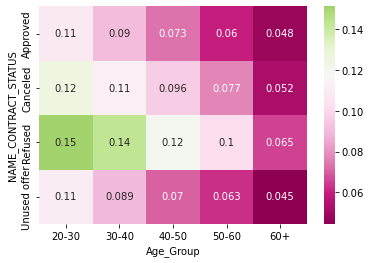

In [165]:
sns.heatmap(res,cmap="PiYG", annot=True, center=0.117)

##### Insights:
##### i.) 15% application refused by the bank of age group 20-30 were defaulters hence avoiding the loss.
##### ii.) 11% defaulters were in age group 20-30 for which bank approved the loans resulting in business loss.
##### iii.) The people with age group above 60+ tend to default less and it's a good business for the bank

### Income Group Distribution

In [166]:
res1 = pd.pivot_table(data=merged_data, index="NAME_CONTRACT_STATUS", columns="Income_Group", values="TARGET")
res1

Income_Group,0-1L,1L-10L,10L-20L,20L-30L,30L-40L,40L-50L,50L+
NAME_CONTRACT_STATUS,,,,,,,
Approved,0.073436,0.076468,0.071429,0.0,0.058824,0.0,0.153846
Canceled,0.092498,0.091602,0.115942,0.0,0.000000,0.0,0.000000
Refused,0.124478,0.119161,0.091667,0.0,0.000000,0.0,0.000000
Unused offer,0.079072,0.083188,0.000000,NaN,NaN,0.0,1.000000


<AxesSubplot:xlabel='Income_Group', ylabel='NAME_CONTRACT_STATUS'>

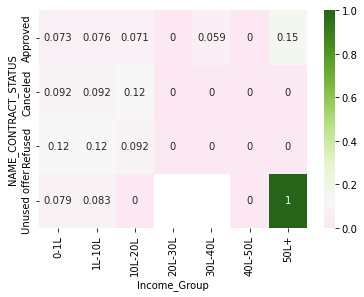

In [167]:
sns.heatmap(res1,cmap="PiYG", annot=True, center=0.117)

#### Insights:
##### i.) The bank has refused potential defaulters with income less than 10L who had 12% default rate
##### ii.) Most of the individuals earning between 20L -50L have repaid their loans. Hence bank has good business with these people

### Credit Group Distribution

In [168]:
res2 = pd.pivot_table(data=merged_data, index="NAME_CONTRACT_STATUS", columns="Credit_Group", values="TARGET")
res2

Credit_Group,0-1L,1L-10L,10L-20L,20L-30L,30L-40L,40L-50L
NAME_CONTRACT_STATUS,,,,,,
Approved,0.048414,0.079678,0.061448,0.035619,0.071429,0.0
Canceled,0.073527,0.096478,0.067769,0.036066,0.000000,NaN
Refused,0.067959,0.126063,0.089398,0.074742,0.000000,NaN
Unused offer,0.018036,0.087768,0.062778,0.083333,NaN,NaN


<AxesSubplot:xlabel='Credit_Group', ylabel='NAME_CONTRACT_STATUS'>

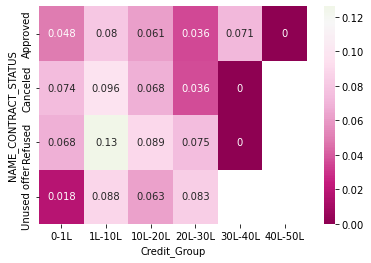

In [169]:
sns.heatmap(res2,cmap="PiYG", annot=True, center=0.117)

### Insights:
##### i.) The bank has faced the most business loss(% wise) for the loans in range 30L-40L for which 7.1% people were the defaulters
##### ii.) There are no defaulters who have taken loans more than 50L+
##### iii.) The bank has rejected 13% application for loans between 1L-10L

### Gender Wise Distribution

In [171]:
res3 = pd.pivot_table(data=merged_data, index="NAME_CONTRACT_STATUS", columns="CODE_GENDER", values="TARGET")
res3

CODE_GENDER,F,M,XNA
NAME_CONTRACT_STATUS,,,
Approved,0.066552,0.095331,0.0
Canceled,0.080927,0.115813,0.0
Refused,0.107053,0.145693,0.0
Unused offer,0.072316,0.099337,NaN


<AxesSubplot:xlabel='CODE_GENDER', ylabel='NAME_CONTRACT_STATUS'>

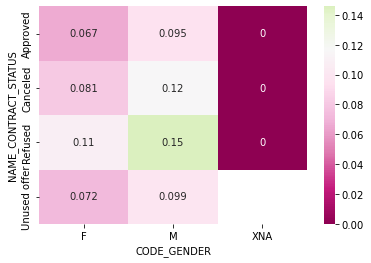

In [172]:
sns.heatmap(res3,cmap="PiYG", annot=True, center=0.117)

#### Insights:
##### i.) There is more business loss on loans given to males as compared to females.
##### ii.) The bank has refused more number of male applicant defaulters (% wise) as compared to females

### Housing Type Distribution

In [174]:
res4 = pd.pivot_table(data=merged_data, index="NAME_CONTRACT_STATUS", columns="NAME_HOUSING_TYPE", values="TARGET")
res4

NAME_HOUSING_TYPE,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
NAME_CONTRACT_STATUS,,,,,,
Approved,0.072453,0.073312,0.083650,0.062850,0.116117,0.111615
Canceled,0.079491,0.088643,0.101760,0.080478,0.141802,0.139855
Refused,0.147193,0.116698,0.131086,0.096259,0.142003,0.170406
Unused offer,0.070288,0.079340,0.078348,0.095506,0.147482,0.116992


<AxesSubplot:xlabel='NAME_HOUSING_TYPE', ylabel='NAME_CONTRACT_STATUS'>

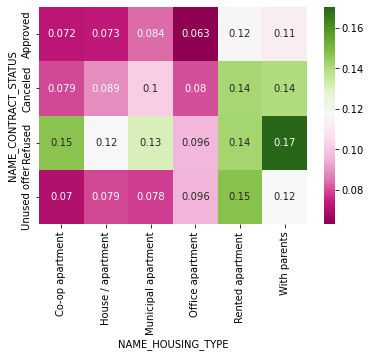

In [175]:
sns.heatmap(res3,cmap="PiYG", annot=True, center=0.117)

### Insights:
##### i.) The most loss incurred by the bank is from the people who either live in rented apartments or live with parents with default rates as 12% and 11% respectively.
##### ii.) The people with office apartment tend to default less as compared to others